## ____Interactive Networks____

#### __Comm__

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import scipy.sparse.linalg as sl

/usr/lib/python3/dist-packages/matplotlib/__init__.py:169: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(module.__version__) < minver:
/usr/local/lib/python3.9/dist-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


#### ____Email : Enron only____ 

In [2]:
tele=nx.read_weighted_edgelist('email-enron-only.txt')
tele

In [3]:
print(len(nx.nodes(tele)))
nx.edges(tele)

nodes1=dict(tele.degree())    #creating a dictionary of nodes and degrees from the graph
nodes1
m1=len(tele.edges());m1

143


623

In [3]:
Adj_M = nx.to_numpy_matrix(tele)     #creating an adjacency matrix as from the node labelling in the graph
G = nx.from_numpy_matrix(Adj_M)     #graph network from the adjacency matrix
A=nx.adjacency_matrix(G)
#A
#Adj_M = nx.adjacency_matrix(tele)
#show(NX.todense())

In [5]:
tele.nodes()

NodeView(('17', '1', '72', '3', '2', '19', '20', '27', '29', '31', '48', '65', '67', '69', '71', '132', '136', '4', '28', '54', '22', '5', '9', '6', '13', '16', '26', '47', '49', '64', '66', '105', '11', '7', '12', '24', '74', '75', '112', '8', '124', '51', '56', '78', '91', '139', '10', '21', '37', '53', '70', '122', '32', '137', '14', '50', '68', '73', '85', '15', '107', '25', '36', '39', '40', '41', '43', '55', '58', '60', '61', '76', '82', '95', '101', '104', '115', '121', '128', '18', '83', '38', '111', '126', '140', '33', '23', '87', '120', '123', '30', '44', '134', '103', '141', '34', '81', '35', '77', '119', '125', '89', '100', '59', '42', '52', '90', '99', '109', '117', '142', '45', '118', '46', '108', '131', '143', '94', '130', '57', '63', '102', '62', '79', '135', '114', '97', '80', '116', '86', '84', '127', '113', '129', '133', '88', '92', '93', '96', '98', '110', '106', '138'))

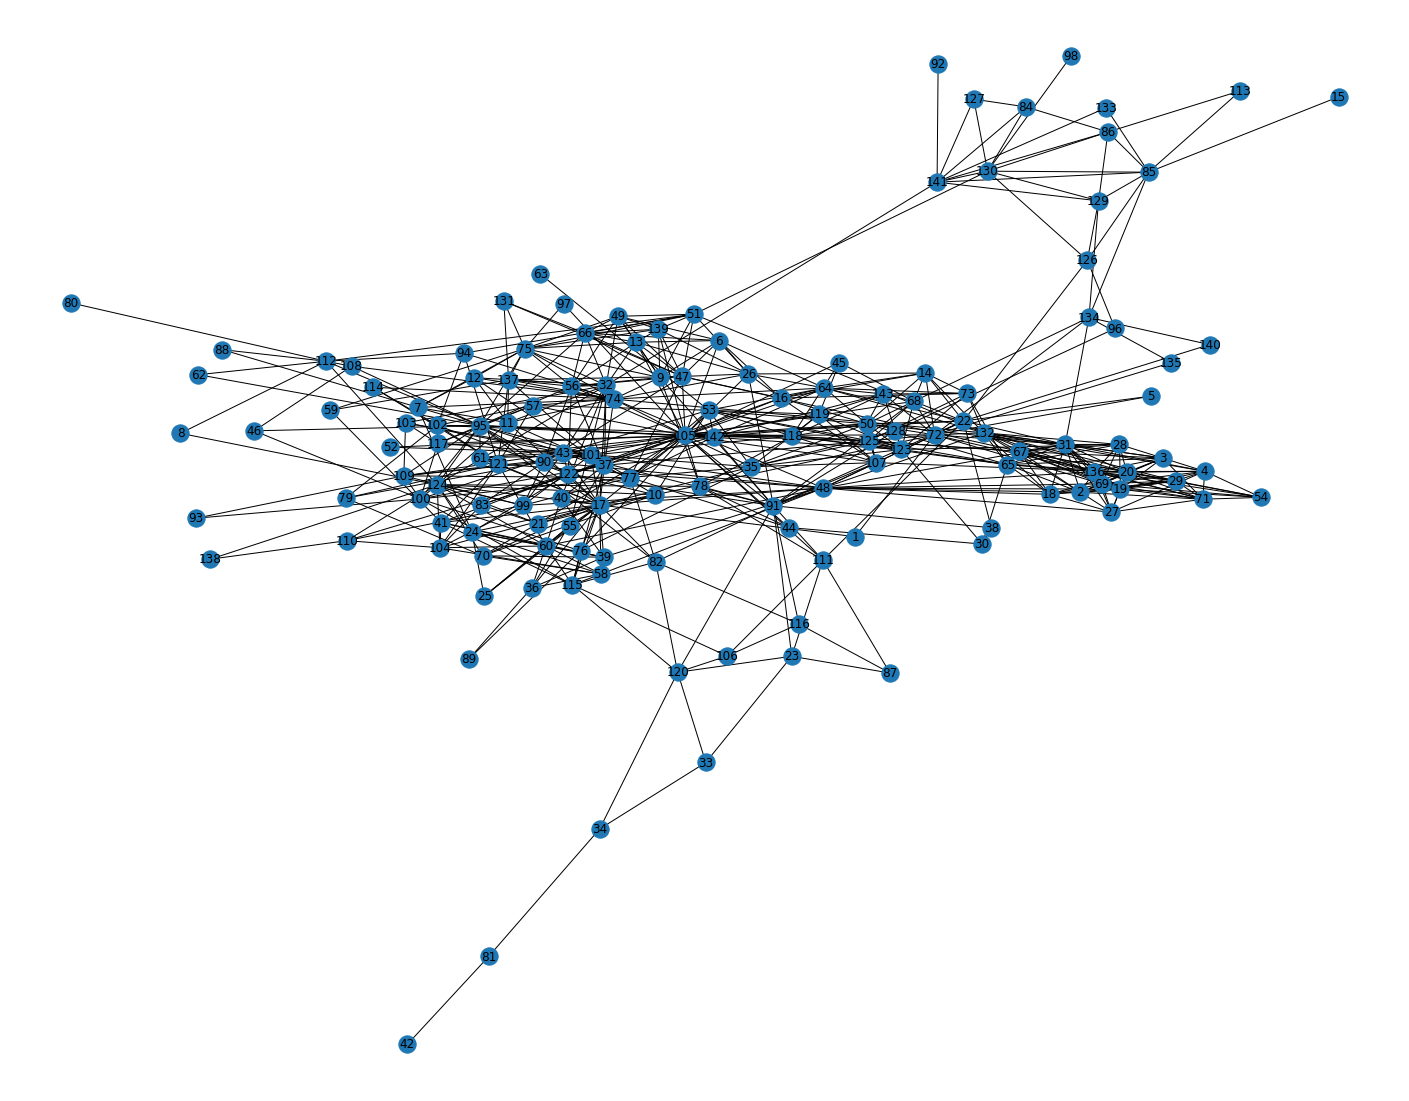

In [6]:
plt.figure(3,figsize=(25,20))   #setting the display feature sizes
nx.draw_networkx(tele)         #drawing a networkx graph
plt.axis('off')       #with no axis
plt.show()      #display the output  

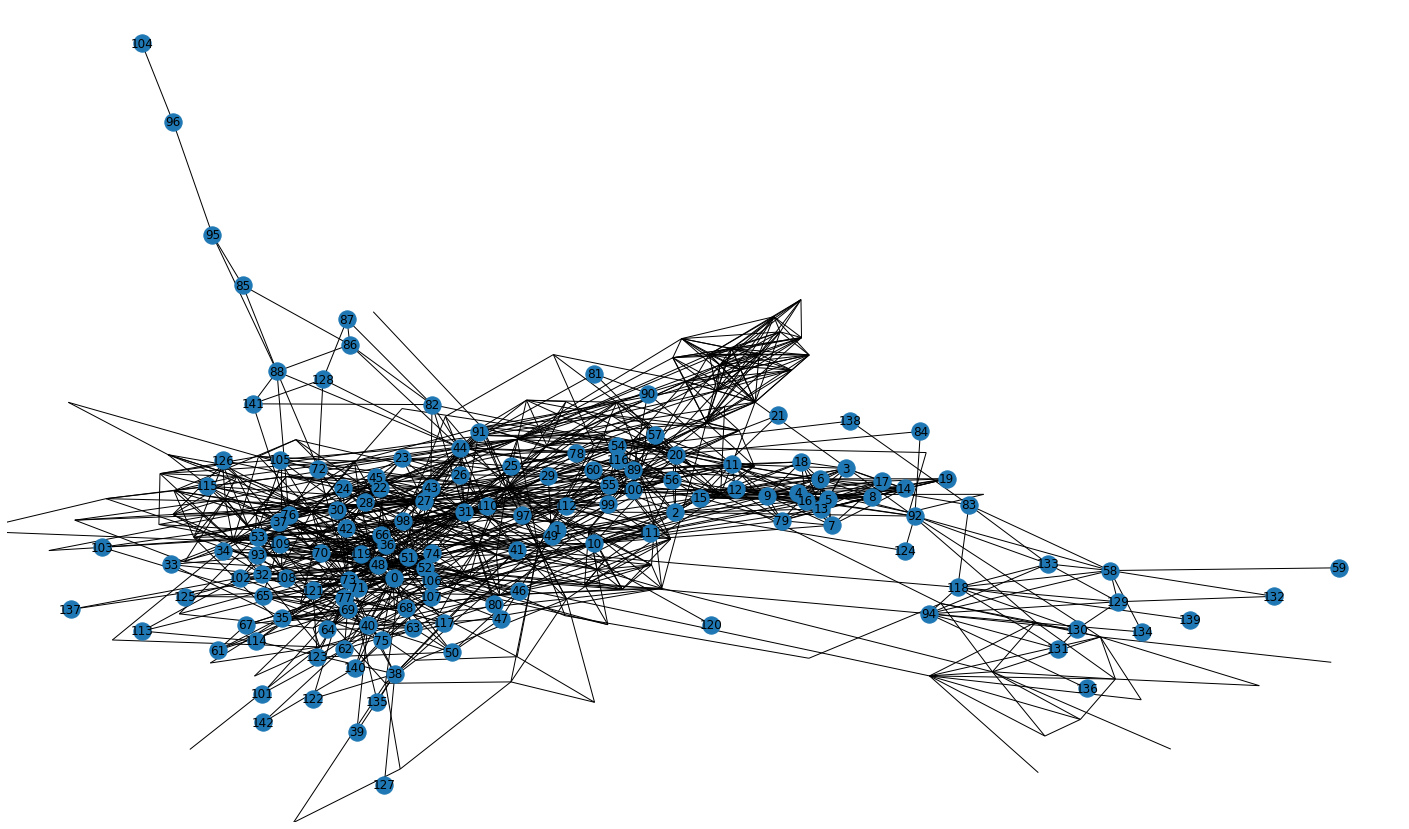

In [7]:
Adj_M = nx.to_numpy_matrix(tele)     #creating an adjacency matrix as from the node labelling in the graph
plt.figure(figsize=(25,15))      #adjusting the display size
G = nx.from_numpy_matrix(Adj_M)     #graph network from the adjacency matrix
pos = nx.spring_layout(G)       #new graph layout
nx.draw_networkx(G)       #drawing the graph
nx.draw_networkx_edges(G,pos)
plt.axis('off')        #eliminating the plot axes
plt.savefig("tele-enron.png")
plt.show()    #displaying

In [4]:
C=sl.expm(A)


/usr/local/lib/python3.9/dist-packages/scipy/sparse/linalg/dsolve/linsolve.py:318: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
/usr/local/lib/python3.9/dist-packages/scipy/sparse/linalg/dsolve/linsolve.py:215: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  warn('spsolve is more efficient when sparse b '


In [10]:
#comm1=nx.communicability(tele)
ass_coef_r1=nx.degree_assortativity_coefficient(tele)
#comm1;
ass_coef_r1


-0.019535922987297238

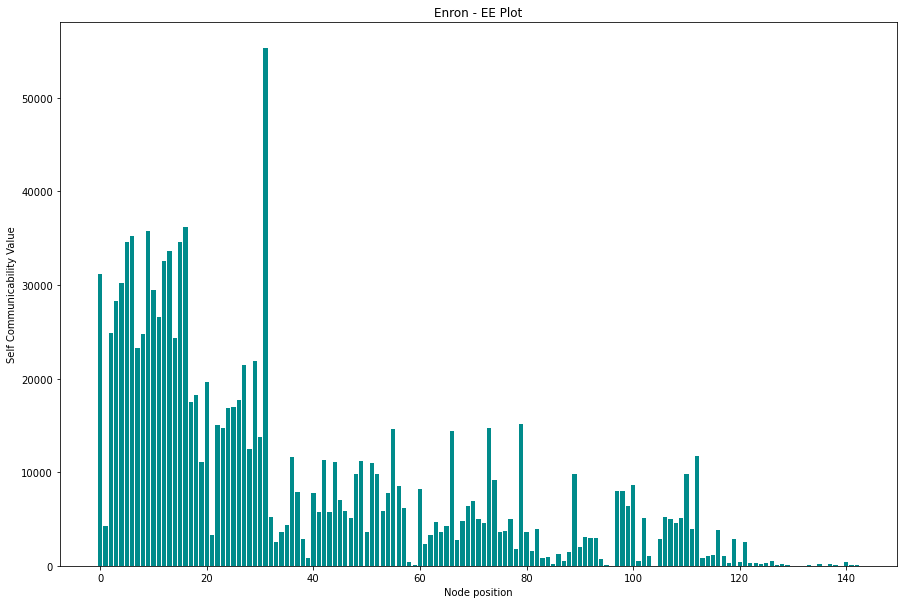

In [5]:
##creating graph from an upper triangular matrix
#plt.figure(figsize=(15,10)) 
##EE(SC)
plt.figure(4,figsize=(15,10))   #setting the display feature sizes
for i in range(len(G.nodes())):
    for j in range(len(G.nodes())):
        if i>j:
            C[i,j]=0
#show(c)
        if C[i,j]!=0:
            plt.bar(i,C[i,j],color='darkcyan')
plt.title('Enron - EE Plot')
plt.xlabel('Node position')        
plt.ylabel('Self Communicability Value')
plt.savefig('enron-SC.eps')
plt.show()

In [6]:
Comm=C.toarray()

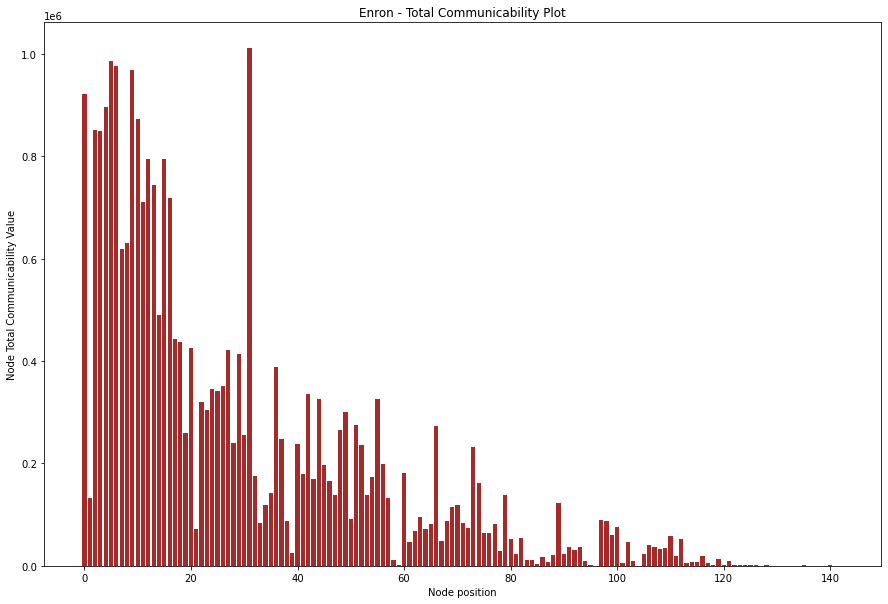

In [7]:
##Total Comm
plt.figure(4,figsize=(15,10))   #setting the display feature sizes
for h in list(G.nodes()):
    plt.bar(h,sum(Comm[h]), color='brown')
plt.title('Enron - Total Communicability Plot')
plt.xlabel('Node position')        
plt.ylabel('Node Total Communicability Value')
plt.savefig('enron-TC.eps')
plt.show()

In [6]:
#C_f=C.todense()

nn=len(G.nodes())
s=C.diagonal().reshape(nn,1)   #EE_n
t=s.transpose()
e=np.ones((nn,1))
f=e.transpose()

In [7]:
sc=list(nx.subgraph_centrality(G).values())
ee=np.array(sc)#reshape(nn1,1)
EE=ee.reshape(nn,1)

In [10]:
show(np.corrcoef(EE,Comm,rowvar=False))

array([[1.        , 0.83124666, 0.90339984, ..., 0.79119862, 0.80599714,
        0.75868259],
       [0.83124666, 1.        , 0.98101927, ..., 0.99656519, 0.9984127 ,
        0.98949837],
       [0.90339984, 0.98101927, 1.        , ..., 0.96170127, 0.96939084,
        0.94320019],
       ...,
       [0.79119862, 0.99656519, 0.96170127, ..., 1.        , 0.99922594,
        0.99797835],
       [0.80599714, 0.9984127 , 0.96939084, ..., 0.99922594, 1.        ,
        0.99491502],
       [0.75868259, 0.98949837, 0.94320019, ..., 0.99797835, 0.99491502,
        1.        ]])

In [16]:
M=sqrt(s*f+e*t-2*Comm)
show(M)

array([[  0.        , 119.81354232,  79.76313771, ..., 118.49357855,
        130.160415  , 131.21772135],
       [139.24028205,   0.        , 104.19504648, ...,   7.33497938,
         11.90910141,  13.0481095 ],
       [183.78699159, 122.88195448,   0.        , ..., 107.3243335 ,
        115.25895306, 116.72049327],
       ...,
       [139.37845001,  27.36181255, 123.03849364, ...,   0.        ,
         12.64186308,  12.91416516],
       [138.2146736 ,  20.63037705, 121.71858769, ...,  21.54318079,
          0.        ,   4.20120383],
       [138.14574294,  20.16340124, 121.64030944, ...,  21.09641985,
         11.04547881,   0.        ]])

In [17]:
g = nx.from_numpy_matrix(M, create_using=nx.MultiGraph)
g

In [18]:
g[0][1]

AtlasView({0: {'weight': 119.81354232312717}})

In [19]:
am=nx.adjacency_matrix(g)
am

<143x143 sparse matrix of type '<class 'numpy.float64'>'
	with 20306 stored elements in Compressed Sparse Row format>

In [23]:
print(nx.average_shortest_path_length(tele))
nx.average_shortest_path_length(g)


2.967004826159756


1.0

In [25]:
print(nx.transitivity(tele),nx.average_clustering(tele))
#nx.transitivity(g)  not implemented in multigraph  #nx.average_clustering(g)

0.3590951932139491 0.43390702914792223


NetworkXNotImplemented: not implemented for multigraph type

In [21]:
for a in nx.all_pairs_shortest_path_length(g,1):
    show(a)

(0,
 {0: 0,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(1,
 {1: 0,
  0: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(2,
 {2: 0,
  0: 1,
  1: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(3,
 {3: 0,
  0: 1,
  1: 1,
  2: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(4,
 {4: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(5,
 {5: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(6,
 {6: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(7,
 {7: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(8,
 {8: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(9,
 {9: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(10,
 {10: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(11,
 {11: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(12,
 {12: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(13,
 {13: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(14,
 {14: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(15,
 {15: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(16,
 {16: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(17,
 {17: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(18,
 {18: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(19,
 {19: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(20,
 {20: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(21,
 {21: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(22,
 {22: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(23,
 {23: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(24,
 {24: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(25,
 {25: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(26,
 {26: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(27,
 {27: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(28,
 {28: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(29,
 {29: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(30,
 {30: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(31,
 {31: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(32,
 {32: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(33,
 {33: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(34,
 {34: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(35,
 {35: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(36,
 {36: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(37,
 {37: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(38,
 {38: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(39,
 {39: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(40,
 {40: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(41,
 {41: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(42,
 {42: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(43,
 {43: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(44,
 {44: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(45,
 {45: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(46,
 {46: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(47,
 {47: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(48,
 {48: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(49,
 {49: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(50,
 {50: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(51,
 {51: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(52,
 {52: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(53,
 {53: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(54,
 {54: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(55,
 {55: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(56,
 {56: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(57,
 {57: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(58,
 {58: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(59,
 {59: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(60,
 {60: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(61,
 {61: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(62,
 {62: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(63,
 {63: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(64,
 {64: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(65,
 {65: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(66,
 {66: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(67,
 {67: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(68,
 {68: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(69,
 {69: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(70,
 {70: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(71,
 {71: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(72,
 {72: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(73,
 {73: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(74,
 {74: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(75,
 {75: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(76,
 {76: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(77,
 {77: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(78,
 {78: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(79,
 {79: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(80,
 {80: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(81,
 {81: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(82,
 {82: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(83,
 {83: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(84,
 {84: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(85,
 {85: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(86,
 {86: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(87,
 {87: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(88,
 {88: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(89,
 {89: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(90,
 {90: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(91,
 {91: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(92,
 {92: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(93,
 {93: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(94,
 {94: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(95,
 {95: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(96,
 {96: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(97,
 {97: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(98,
 {98: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(99,
 {99: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(100,
 {100: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(101,
 {101: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(102,
 {102: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(103,
 {103: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(104,
 {104: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(105,
 {105: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(106,
 {106: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(107,
 {107: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(108,
 {108: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(109,
 {109: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(110,
 {110: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(111,
 {111: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(112,
 {112: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(113,
 {113: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(114,
 {114: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(115,
 {115: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(116,
 {116: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(117,
 {117: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(118,
 {118: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(119,
 {119: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(120,
 {120: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(121,
 {121: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(122,
 {122: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(123,
 {123: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(124,
 {124: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(125,
 {125: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(126,
 {126: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(127,
 {127: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(128,
 {128: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(129,
 {129: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(130,
 {130: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(131,
 {131: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(132,
 {132: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(133,
 {133: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(134,
 {134: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(135,
 {135: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(136,
 {136: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(137,
 {137: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(138,
 {138: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  139: 1,
  140: 1,
  141: 1,
  142: 1})

(139,
 {139: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  140: 1,
  141: 1,
  142: 1})

(140,
 {140: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  141: 1,
  142: 1})

(141,
 {141: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  142: 1})

(142,
 {142: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  113: 1,
  114: 1,
  115: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  125: 1,
  126: 1,
  127: 1,
  128: 1,
  129: 1,
  130: 1,
  131: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 1})

In [22]:
for D in nx.all_pairs_shortest_path_length(G,1):
    show(D)

(0,
 {0: 0,
  1: 1,
  10: 1,
  31: 1,
  32: 1,
  35: 1,
  40: 1,
  46: 1,
  47: 1,
  48: 1,
  50: 1,
  51: 1,
  52: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1})

(1, {1: 0, 0: 1, 2: 1})

(2,
 {2: 0,
  1: 1,
  9: 1,
  10: 1,
  13: 1,
  46: 1,
  15: 1,
  16: 1,
  48: 1,
  124: 1,
  20: 1,
  21: 1,
  54: 1,
  55: 1,
  56: 1,
  116: 1,
  92: 1,
  31: 1})

(3,
 {3: 0,
  4: 1,
  5: 1,
  6: 1,
  9: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1})

(4,
 {4: 0,
  3: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1})

(5,
 {5: 0,
  3: 1,
  4: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  79: 1})

(6,
 {6: 0,
  3: 1,
  4: 1,
  5: 1,
  7: 1,
  8: 1,
  9: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  79: 1,
  60: 1})

(7, {7: 0, 4: 1, 5: 1, 6: 1, 9: 1, 10: 1, 13: 1, 14: 1, 79: 1, 16: 1, 17: 1})

(8,
 {8: 0,
  4: 1,
  5: 1,
  6: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  79: 1,
  19: 1})

(9,
 {9: 0,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  79: 1,
  20: 1,
  55: 1,
  92: 1})

(10,
 {10: 0,
  0: 1,
  2: 1,
  4: 1,
  5: 1,
  7: 1,
  9: 1,
  13: 1,
  15: 1,
  16: 1,
  20: 1,
  36: 1,
  44: 1,
  63: 1,
  68: 1,
  69: 1,
  74: 1,
  77: 1,
  79: 1,
  106: 1,
  107: 1})

(11,
 {11: 0,
  89: 1,
  3: 1,
  4: 1,
  100: 1,
  6: 1,
  9: 1,
  12: 1,
  15: 1,
  16: 1,
  79: 1,
  18: 1,
  112: 1,
  55: 1,
  57: 1,
  90: 1})

(12,
 {12: 0,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  100: 1,
  8: 1,
  9: 1,
  11: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  79: 1,
  18: 1,
  112: 1,
  27: 1})

(13,
 {13: 0,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  12: 1,
  14: 1,
  79: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1})

(14,
 {14: 0,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  12: 1,
  13: 1,
  16: 1,
  17: 1,
  19: 1})

(15,
 {15: 0,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  16: 1,
  17: 1,
  18: 1,
  29: 1,
  36: 1,
  41: 1,
  54: 1,
  57: 1,
  79: 1})

(16,
 {16: 0,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  17: 1,
  18: 1,
  19: 1})

(17,
 {17: 0,
  3: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  19: 1})

(18, {18: 0, 3: 1, 5: 1, 6: 1, 9: 1, 11: 1, 12: 1, 13: 1, 15: 1, 16: 1, 89: 1})

(19, {19: 0, 5: 1, 6: 1, 8: 1, 13: 1, 14: 1, 16: 1, 17: 1})

(20,
 {20: 0,
  2: 1,
  9: 1,
  10: 1,
  44: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  21: 1,
  54: 1,
  55: 1,
  56: 1,
  29: 1,
  31: 1})

(21, {21: 0, 2: 1, 20: 1})

(22,
 {22: 0,
  36: 1,
  37: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  23: 1,
  24: 1,
  27: 1,
  28: 1,
  30: 1})

(23, {23: 0, 22: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 1, 31: 1})

(24,
 {24: 0,
  37: 1,
  42: 1,
  45: 1,
  52: 1,
  22: 1,
  23: 1,
  26: 1,
  27: 1,
  28: 1,
  30: 1,
  31: 1})

(25,
 {25: 0, 51: 1, 55: 1, 54: 1, 23: 1, 57: 1, 26: 1, 27: 1, 60: 1, 29: 1, 31: 1})

(26,
 {26: 0,
  36: 1,
  41: 1,
  44: 1,
  45: 1,
  54: 1,
  23: 1,
  24: 1,
  25: 1,
  27: 1,
  29: 1,
  31: 1})

(27,
 {27: 0,
  98: 1,
  41: 1,
  42: 1,
  106: 1,
  12: 1,
  45: 1,
  115: 1,
  53: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  28: 1,
  30: 1,
  31: 1})

(28,
 {28: 0, 37: 1, 41: 1, 42: 1, 45: 1, 52: 1, 22: 1, 23: 1, 24: 1, 27: 1, 30: 1})

(29,
 {29: 0,
  36: 1,
  110: 1,
  15: 1,
  49: 1,
  20: 1,
  55: 1,
  54: 1,
  23: 1,
  116: 1,
  25: 1,
  26: 1,
  57: 1,
  31: 1})

(30,
 {30: 0,
  41: 1,
  42: 1,
  73: 1,
  45: 1,
  115: 1,
  52: 1,
  22: 1,
  23: 1,
  24: 1,
  27: 1,
  28: 1})

(31,
 {31: 0,
  0: 1,
  2: 1,
  20: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  29: 1,
  36: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  47: 1,
  48: 1,
  49: 1,
  51: 1,
  55: 1,
  56: 1,
  60: 1,
  66: 1,
  70: 1,
  71: 1,
  73: 1,
  74: 1,
  80: 1,
  82: 1,
  89: 1,
  91: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  105: 1,
  109: 1,
  110: 1,
  111: 1,
  112: 1,
  119: 1,
  121: 1,
  126: 1})

(32, {32: 0, 0: 1, 33: 1, 34: 1, 36: 1, 40: 1, 48: 1, 52: 1, 53: 1})

(33, {33: 0, 32: 1, 34: 1, 35: 1, 36: 1, 37: 1})

(34, {34: 0, 32: 1, 33: 1, 36: 1, 37: 1, 48: 1, 52: 1})

(35, {35: 0, 0: 1, 33: 1, 68: 1, 69: 1, 40: 1, 51: 1, 61: 1, 63: 1})

(36,
 {36: 0,
  32: 1,
  33: 1,
  34: 1,
  37: 1,
  10: 1,
  42: 1,
  15: 1,
  48: 1,
  114: 1,
  52: 1,
  53: 1,
  22: 1,
  117: 1,
  119: 1,
  125: 1,
  26: 1,
  29: 1,
  31: 1})

(37,
 {37: 0,
  33: 1,
  34: 1,
  36: 1,
  103: 1,
  41: 1,
  42: 1,
  73: 1,
  45: 1,
  115: 1,
  52: 1,
  53: 1,
  22: 1,
  24: 1,
  28: 1,
  126: 1})

(38,
 {38: 0, 39: 1, 40: 1, 41: 1, 73: 1, 135: 1, 114: 1, 117: 1, 122: 1, 127: 1})

(39, {39: 0, 40: 1, 38: 1})

(40,
 {40: 0,
  0: 1,
  32: 1,
  35: 1,
  69: 1,
  38: 1,
  39: 1,
  102: 1,
  73: 1,
  43: 1,
  75: 1,
  107: 1,
  46: 1,
  47: 1,
  140: 1,
  142: 1,
  50: 1,
  52: 1})

(41,
 {41: 0,
  37: 1,
  38: 1,
  45: 1,
  15: 1,
  117: 1,
  22: 1,
  118: 1,
  26: 1,
  27: 1,
  28: 1,
  30: 1})

(42,
 {42: 0,
  36: 1,
  37: 1,
  73: 1,
  106: 1,
  48: 1,
  51: 1,
  52: 1,
  53: 1,
  22: 1,
  24: 1,
  27: 1,
  28: 1,
  30: 1,
  31: 1})

(43, {43: 0, 40: 1, 44: 1, 112: 1, 82: 1, 22: 1, 91: 1, 31: 1})

(44,
 {44: 0,
  128: 1,
  66: 1,
  72: 1,
  10: 1,
  43: 1,
  78: 1,
  110: 1,
  81: 1,
  82: 1,
  51: 1,
  20: 1,
  22: 1,
  86: 1,
  56: 1,
  26: 1,
  88: 1,
  60: 1,
  31: 1})

(45, {45: 0, 37: 1, 41: 1, 22: 1, 24: 1, 26: 1, 27: 1, 28: 1, 30: 1, 31: 1})

(46, {46: 0, 0: 1, 2: 1, 40: 1, 47: 1, 48: 1, 49: 1, 50: 1, 51: 1})

(47, {47: 0, 0: 1, 40: 1, 46: 1, 80: 1, 50: 1, 31: 1})

(48,
 {48: 0,
  0: 1,
  32: 1,
  2: 1,
  34: 1,
  36: 1,
  64: 1,
  102: 1,
  42: 1,
  76: 1,
  46: 1,
  52: 1,
  53: 1,
  62: 1,
  31: 1})

(49,
 {49: 0,
  97: 1,
  66: 1,
  98: 1,
  99: 1,
  100: 1,
  46: 1,
  110: 1,
  112: 1,
  119: 1,
  55: 1,
  120: 1,
  89: 1,
  29: 1,
  31: 1})

(50, {50: 0, 0: 1, 68: 1, 40: 1, 46: 1, 47: 1, 123: 1, 63: 1})

(51,
 {51: 0,
  0: 1,
  65: 1,
  66: 1,
  35: 1,
  121: 1,
  73: 1,
  42: 1,
  44: 1,
  140: 1,
  46: 1,
  110: 1,
  80: 1,
  25: 1,
  31: 1})

(52,
 {52: 0,
  0: 1,
  32: 1,
  34: 1,
  64: 1,
  36: 1,
  37: 1,
  66: 1,
  67: 1,
  40: 1,
  42: 1,
  48: 1,
  53: 1,
  24: 1,
  94: 1,
  28: 1,
  93: 1,
  30: 1})

(53,
 {53: 0,
  32: 1,
  36: 1,
  37: 1,
  103: 1,
  42: 1,
  77: 1,
  48: 1,
  115: 1,
  52: 1,
  27: 1})

(54, {54: 0, 2: 1, 15: 1, 20: 1, 55: 1, 56: 1, 25: 1, 26: 1, 29: 1, 57: 1})

(55,
 {55: 0,
  89: 1,
  97: 1,
  2: 1,
  9: 1,
  11: 1,
  110: 1,
  112: 1,
  49: 1,
  20: 1,
  116: 1,
  54: 1,
  56: 1,
  25: 1,
  60: 1,
  29: 1,
  31: 1})

(56,
 {56: 0,
  2: 1,
  100: 1,
  44: 1,
  111: 1,
  20: 1,
  116: 1,
  54: 1,
  55: 1,
  89: 1,
  92: 1,
  31: 1})

(57, {57: 0, 89: 1, 100: 1, 11: 1, 15: 1, 116: 1, 54: 1, 25: 1, 29: 1})

(58,
 {58: 0, 129: 1, 132: 1, 133: 1, 134: 1, 83: 1, 118: 1, 59: 1, 92: 1, 94: 1})

(59, {59: 0, 58: 1})

(60, {60: 0, 97: 1, 99: 1, 100: 1, 6: 1, 44: 1, 112: 1, 55: 1, 25: 1, 31: 1})

(61, {61: 0, 0: 1, 67: 1, 35: 1, 69: 1})

(62, {62: 0, 0: 1, 68: 1, 69: 1, 101: 1, 48: 1, 63: 1})

(63, {63: 0, 0: 1, 64: 1, 65: 1, 35: 1, 68: 1, 69: 1, 10: 1, 50: 1, 62: 1})

(64, {64: 0, 0: 1, 69: 1, 48: 1, 52: 1, 63: 1})

(65, {65: 0, 0: 1, 69: 1, 103: 1, 75: 1, 76: 1, 77: 1, 51: 1, 63: 1})

(66,
 {66: 0,
  0: 1,
  31: 1,
  44: 1,
  49: 1,
  51: 1,
  52: 1,
  70: 1,
  73: 1,
  74: 1,
  93: 1,
  97: 1,
  98: 1,
  102: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1})

(67, {67: 0, 0: 1, 69: 1, 52: 1, 61: 1})

(68, {68: 0, 0: 1, 35: 1, 69: 1, 10: 1, 75: 1, 76: 1, 50: 1, 62: 1, 63: 1})

(69,
 {69: 0,
  0: 1,
  64: 1,
  65: 1,
  35: 1,
  67: 1,
  68: 1,
  40: 1,
  10: 1,
  75: 1,
  76: 1,
  77: 1,
  61: 1,
  62: 1,
  63: 1})

(70, {70: 0, 0: 1, 66: 1, 73: 1, 74: 1, 77: 1, 31: 1})

(71, {71: 0, 0: 1, 97: 1, 101: 1, 102: 1, 76: 1, 31: 1})

(72, {72: 0, 0: 1, 128: 1, 98: 1, 73: 1, 44: 1, 76: 1, 88: 1})

(73,
 {73: 0,
  0: 1,
  135: 1,
  30: 1,
  31: 1,
  37: 1,
  38: 1,
  40: 1,
  42: 1,
  51: 1,
  66: 1,
  70: 1,
  72: 1,
  74: 1,
  102: 1,
  108: 1,
  109: 1,
  110: 1,
  112: 1,
  113: 1,
  114: 1,
  119: 1,
  121: 1,
  122: 1})

(74,
 {74: 0,
  0: 1,
  66: 1,
  98: 1,
  70: 1,
  73: 1,
  10: 1,
  106: 1,
  107: 1,
  108: 1,
  112: 1,
  93: 1,
  31: 1})

(75, {75: 0, 0: 1, 65: 1, 68: 1, 69: 1, 40: 1, 107: 1, 140: 1, 77: 1, 80: 1})

(76,
 {76: 0,
  0: 1,
  65: 1,
  68: 1,
  69: 1,
  102: 1,
  71: 1,
  72: 1,
  141: 1,
  48: 1,
  88: 1})

(77,
 {77: 0,
  0: 1,
  65: 1,
  69: 1,
  70: 1,
  10: 1,
  75: 1,
  53: 1,
  117: 1,
  119: 1,
  121: 1,
  123: 1,
  125: 1})

(78, {78: 0, 0: 1, 138: 1, 44: 1})

(79, {79: 0, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 15: 1})

(80, {80: 0, 106: 1, 75: 1, 47: 1, 51: 1, 31: 1})

(81, {81: 0, 90: 1, 20: 1, 44: 1})

(82, {82: 0, 43: 1, 44: 1, 141: 1, 20: 1, 86: 1, 87: 1, 31: 1})

(83, {83: 0, 133: 1, 138: 1, 20: 1, 118: 1, 58: 1})

(84, {84: 0, 20: 1, 92: 1})

(85, {85: 0, 88: 1, 86: 1, 95: 1})

(86, {86: 0, 44: 1, 82: 1, 85: 1, 87: 1, 88: 1})

(87, {87: 0, 128: 1, 82: 1, 86: 1})

(88, {88: 0, 72: 1, 44: 1, 76: 1, 141: 1, 85: 1, 86: 1, 95: 1})

(89,
 {89: 0,
  97: 1,
  99: 1,
  100: 1,
  11: 1,
  112: 1,
  49: 1,
  18: 1,
  116: 1,
  55: 1,
  56: 1,
  57: 1,
  90: 1,
  31: 1})

(90, {90: 0, 89: 1, 81: 1, 91: 1, 11: 1})

(91, {91: 0, 90: 1, 43: 1, 98: 1, 31: 1})

(92, {92: 0, 2: 1, 133: 1, 9: 1, 84: 1, 56: 1, 58: 1, 124: 1})

(93, {93: 0, 66: 1, 74: 1, 108: 1, 109: 1, 52: 1})

(94,
 {94: 0, 129: 1, 130: 1, 131: 1, 133: 1, 134: 1, 136: 1, 52: 1, 118: 1, 58: 1})

(95, {95: 0, 88: 1, 96: 1, 85: 1})

(96, {96: 0, 104: 1, 95: 1})

(97,
 {97: 0,
  66: 1,
  98: 1,
  99: 1,
  100: 1,
  71: 1,
  49: 1,
  55: 1,
  89: 1,
  60: 1,
  31: 1})

(98,
 {98: 0,
  97: 1,
  66: 1,
  102: 1,
  72: 1,
  74: 1,
  91: 1,
  107: 1,
  108: 1,
  110: 1,
  49: 1,
  27: 1,
  31: 1})

(99, {99: 0, 97: 1, 111: 1, 112: 1, 49: 1, 116: 1, 89: 1, 60: 1, 31: 1})

(100,
 {100: 0,
  89: 1,
  97: 1,
  11: 1,
  12: 1,
  112: 1,
  49: 1,
  56: 1,
  57: 1,
  60: 1,
  31: 1})

(101, {101: 0, 62: 1, 71: 1})

(102,
 {102: 0,
  66: 1,
  98: 1,
  71: 1,
  40: 1,
  73: 1,
  137: 1,
  76: 1,
  108: 1,
  109: 1,
  48: 1,
  113: 1})

(103, {103: 0, 65: 1, 53: 1, 37: 1})

(104, {104: 0, 96: 1})

(105, {105: 0, 66: 1, 31: 1})

(106,
 {106: 0, 66: 1, 74: 1, 10: 1, 42: 1, 107: 1, 108: 1, 123: 1, 80: 1, 27: 1})

(107,
 {107: 0, 66: 1, 98: 1, 40: 1, 10: 1, 75: 1, 74: 1, 106: 1, 108: 1, 140: 1})

(108,
 {108: 0, 66: 1, 98: 1, 102: 1, 73: 1, 74: 1, 106: 1, 107: 1, 137: 1, 93: 1})

(109, {109: 0, 66: 1, 102: 1, 73: 1, 119: 1, 121: 1, 93: 1, 31: 1})

(110,
 {110: 0,
  66: 1,
  98: 1,
  73: 1,
  44: 1,
  112: 1,
  49: 1,
  51: 1,
  116: 1,
  55: 1,
  29: 1,
  31: 1})

(111, {111: 0, 56: 1, 99: 1, 112: 1, 31: 1})

(112,
 {112: 0,
  99: 1,
  100: 1,
  73: 1,
  74: 1,
  43: 1,
  11: 1,
  12: 1,
  110: 1,
  111: 1,
  49: 1,
  116: 1,
  55: 1,
  89: 1,
  60: 1,
  31: 1})

(113, {113: 0, 73: 1, 114: 1, 102: 1})

(114, {114: 0, 73: 1, 36: 1, 38: 1, 113: 1})

(115, {115: 0, 53: 1, 27: 1, 37: 1, 30: 1})

(116, {116: 0, 89: 1, 2: 1, 99: 1, 110: 1, 112: 1, 55: 1, 56: 1, 57: 1, 29: 1})

(117, {117: 0, 36: 1, 38: 1, 41: 1, 77: 1, 121: 1})

(118,
 {118: 0, 129: 1, 130: 1, 131: 1, 133: 1, 41: 1, 139: 1, 83: 1, 58: 1, 94: 1})

(119, {119: 0, 36: 1, 73: 1, 77: 1, 109: 1, 49: 1, 121: 1, 31: 1})

(120, {120: 0, 49: 1})

(121,
 {121: 0, 73: 1, 109: 1, 77: 1, 51: 1, 117: 1, 119: 1, 123: 1, 125: 1, 31: 1})

(122, {122: 0, 73: 1, 38: 1})

(123, {123: 0, 121: 1, 50: 1, 77: 1, 106: 1})

(124, {124: 0, 2: 1, 92: 1})

(125, {125: 0, 121: 1, 36: 1, 77: 1})

(126, {126: 0, 37: 1, 31: 1})

(127, {127: 0, 38: 1})

(128, {128: 0, 72: 1, 44: 1, 141: 1, 87: 1})

(129, {129: 0, 130: 1, 132: 1, 133: 1, 118: 1, 58: 1, 94: 1})

(130, {130: 0, 129: 1, 118: 1, 131: 1, 94: 1})

(131, {131: 0, 118: 1, 94: 1, 130: 1})

(132, {132: 0, 129: 1, 58: 1})

(133, {133: 0, 129: 1, 83: 1, 118: 1, 58: 1, 92: 1, 94: 1})

(134, {134: 0, 58: 1, 94: 1})

(135, {135: 0, 73: 1, 38: 1})

(136, {136: 0, 94: 1})

(137, {137: 0, 108: 1, 102: 1})

(138, {138: 0, 83: 1, 78: 1})

(139, {139: 0, 118: 1})

(140, {140: 0, 40: 1, 107: 1, 75: 1, 142: 1, 51: 1})

(141, {141: 0, 88: 1, 82: 1, 76: 1, 128: 1})

(142, {142: 0, 40: 1, 140: 1})

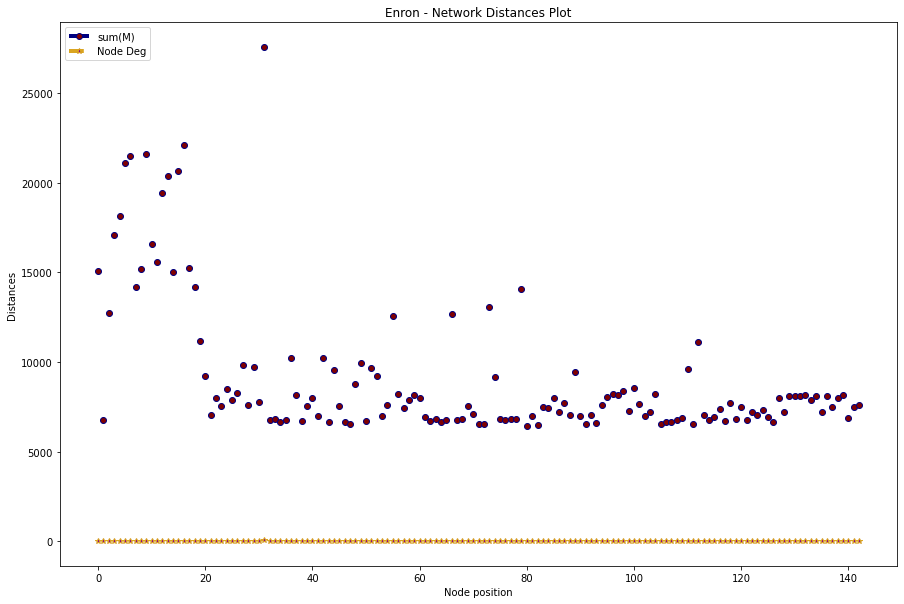

In [39]:
plt.figure(4,figsize=(15,10))   #setting the display feature sizes
for i in range(len(G.nodes())):
    #for j in range(len(G.nodes())): 
    plt.plot(i,sum(am[i]),color='navy',ls='-.',lw=4,marker='o',markerfacecolor='maroon')
    plt.plot(i,sum(A[i]),color='goldenrod',ls='--',lw=4,marker='*',markerfacecolor='darkmagenta')

plt.title('Enron - Network Distances Plot')
plt.xlabel('Node position')        
plt.ylabel('Distances')
plt.savefig('enron-D.png')
plt.legend(['sum(M)','Node Deg'],loc=2)
plt.show()

## node positions

In [8]:
degree_sequence1_p = [d for n, d in G.degree()]  # degree sequence
list(set(degree_sequence1_p))
deg1_p=nx.degree(G)
#y1 = list(comm1.values())

In [9]:
#5 nodes with the highest degree
#l_deg=comm.degree_sequence()[-1:]   #sorting out the list in ascending order
l_deg1_p=[min(degree_sequence1_p)]   #sorting out the list in ascending order
print('The lowest degree : ',l_deg1_p)     #displaying the last 5 values
low_deg_nodes1_p=[]
for i in deg1_p(G):
    if i[1] in l_deg1_p:
        low_deg_nodes1_p.append(int(i[0]))
print('Their respective corresponding nodes position are',low_deg_nodes1_p)
l_deg1_p
per1=int(len(low_deg_nodes1_p))*100//len(nx.nodes(G))
print(len(low_deg_nodes1_p),'\n',per1,'%')

The lowest degree :  [1]
Their respective corresponding nodes position are [59, 104, 120, 127, 136, 139]
6 
 4 %


In [10]:
#h_deg=[comm.degree_sequence()[0]]   #sorting out the list in ascending order
h_deg1_p=[max(degree_sequence1_p)]   #sorting out the list in ascending order
print('The highest degree : ',h_deg1_p)     #displaying the last 5 values
hubs1_p=[]
for i in deg1_p(G):
    if i[1] in h_deg1_p:
        hubs1_p.append(int(i[0]))
print('Their respective corresponding nodes position : ',hubs1_p)
len(h_deg1_p)

The highest degree :  [42]
Their respective corresponding nodes position :  [31]


1

## nodes

In [11]:
degree_sequence1 = [d for n, d in tele.degree()]  # degree sequence
list(set(degree_sequence1))
deg1=nx.degree(tele)

In [12]:
l_deg1=[min(degree_sequence1)]   #sorting out the list in ascending order
print('The lowest degree : ',l_deg1)     #displaying the last 5 values
low_deg_nodes1=[]
for i in deg1(tele):
    if i[1] in l_deg1:
        low_deg_nodes1.append(int(i[0]))
print('Their respective corresponding nodes are',low_deg_nodes1)
l_deg1
per1=int(len(low_deg_nodes1))*100//len(nx.nodes(tele))

The lowest degree :  [1]
Their respective corresponding nodes are [15, 42, 63, 80, 92, 98]


In [13]:
h_deg1=[max(degree_sequence1)]   #sorting out the list in ascending order
print('The highest degree : ',h_deg1)     #displaying the last 5 values
hubs1=[]
for i in deg1(tele):
    if i[1] in h_deg1:
        hubs1.append(int(i[0]))
print('Their respective corresponding nodes position : ',hubs1)

The highest degree :  [42]
Their respective corresponding nodes position :  [105]


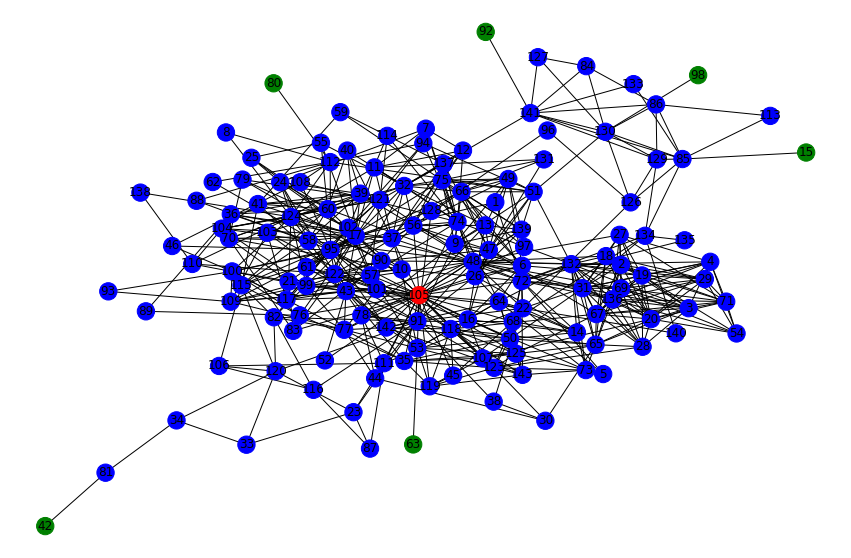

In [39]:
#highlights the network by partitioning into 3 communities depending on the connectivity
nodes1=dict(tele.degree());nodes1    #creating a dictionary of nodes and degrees from the graph
deg1=list(nodes1.values())       #Getting the degree of particular nodes 
n1=len(deg1)
color = []   # a list of color for highlighting
#hubs =[2,29,32,35]
for i in range(n1):     #iteration for partitioning
    if int(list(nodes1)[i]) in hubs1:      #highly connected nodes conditioning, the top 5 
        color.append('r')     
    elif int(list(nodes1)[i]) in low_deg_nodes1:                 #less connected
        color.append('g')
    else :
        color.append('b')
pos=nx.kamada_kawai_layout(tele)      #redrawing the network
plt.figure(figsize=(15,10))    #plot figure
nx.draw_networkx(tele,pos,node_color = color)      #depending on the color partition
plt.axis('off')
plt.savefig('tele_part.png')
plt.show()      #displaying

In [144]:
sum(M[31])


30387.576129160763

In [139]:
M[31,31]
sum(Comm[31])


1011283.6457943355

In [184]:
##EE
for k in low_deg_nodes1_p:
    print(k,':',N(C[k,k],digits=8),'and',N(sum(Comm[k]),digits=8))
print('31:',N(C[31,31],digits=8))

59 : 2.8707632 and 802.47550
104 : 1.5931005 and 8.2139774
120 : 56.671293 and 1456.8066
127 : 5.7182178 and 148.73045
136 : 3.1892872 and 31.027674
139 : 3.0660253 and 16.437628
31: 55313.391


In [145]:
for c in low_deg_nodes1_p:
    print(c,':',sum(M[c]))

59 : 8174.963160660135
104 : 8199.748739715571
120 : 8277.426231496816
127 : 8200.315901106294
136 : 8203.158618648842
139 : 8205.15258972846


## communicability and its distances

In [38]:

for I in hubs1_p:
    c1=list(Comm[I-1])
    cd1=list(M[I-1])
    for J in (low_deg_nodes1_p):
        print(I,':',J,' = ',N(c1[J-1],digits=8),'and',N(cd1[J-1],digits=8))

31 : 59  =  227.08806 and 58.697491
31 : 104  =  735.88594 and 50.164443
31 : 120  =  3140.1271 and 20.654285
31 : 127  =  1392.5210 and 39.848452
31 : 136  =  665.46780 and 51.358228
31 : 139  =  108.74284 and 60.208504


In [99]:
for J in low_deg_nodes1_p:
    lc1=list(Comm[J-1])
    lcd1=list(M[J-1])
    for j in low_deg_nodes1_p:
        #s=[]
        if j!=J & J<=j:
            #s.append(lc[j-1])
            print(J,':',j,'=',N(lc1[j-1],digits=8),'and',N(lcd1[J-1],digits=8))

59 : 104 = 42.810547 and 0.00000000
59 : 120 = 200.93735 and 0.00000000
59 : 127 = 87.931645 and 0.00000000
59 : 136 = 39.426327 and 0.00000000
59 : 139 = 12.116980 and 0.00000000
104 : 120 = 609.25991 and 0.00000000
104 : 127 = 267.48562 and 0.00000000
104 : 136 = 131.00424 and 0.00000000
104 : 139 = 21.552024 and 0.00000000
120 : 127 = 1230.2309 and 0.00000000
120 : 136 = 599.21726 and 0.00000000
120 : 139 = 101.16510 and 0.00000000
127 : 136 = 255.65285 and 0.00000000
127 : 139 = 43.183779 and 0.00000000
136 : 139 = 20.985070 and 0.00000000


In [100]:
for J in low_deg_nodes1_p:
    #lc1=list(Comm[J-1])
    lcd1=list(M[J-1])
    for j in low_deg_nodes1_p:
        #s=[]
        if j!=J & J<=j:
            #s.append(lc[j-1])
            print(J,':',j,'=',N(lcd1[J-1],digits=8))

59 : 104 = 0.00000000
59 : 120 = 0.00000000
59 : 127 = 0.00000000
59 : 136 = 0.00000000
59 : 139 = 0.00000000
104 : 120 = 0.00000000
104 : 127 = 0.00000000
104 : 136 = 0.00000000
104 : 139 = 0.00000000
120 : 127 = 0.00000000
120 : 136 = 0.00000000
120 : 139 = 0.00000000
127 : 136 = 0.00000000
127 : 139 = 0.00000000
136 : 139 = 0.00000000


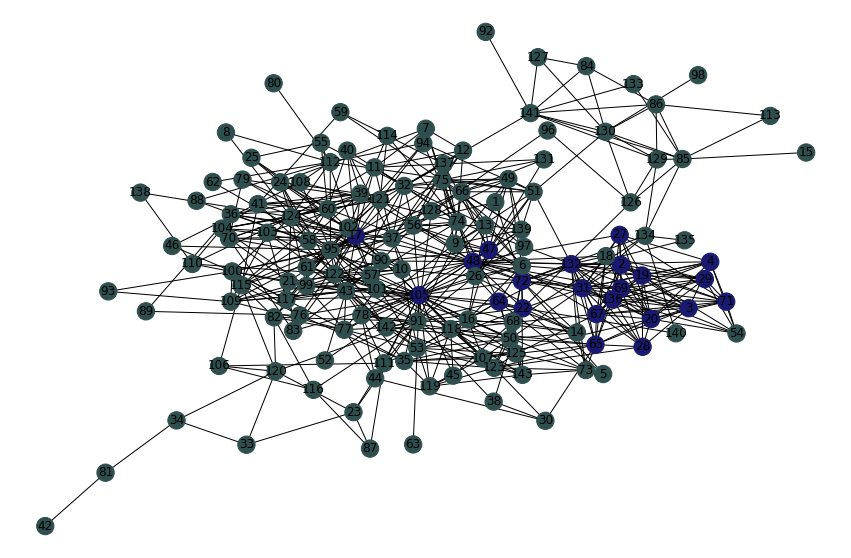

In [14]:
#highlights the network by partitioning into 3 communities depending on total communicabilities
nodes1=dict(tele.degree());nodes1    #creating a dictionary of nodes and degrees from the graph
deg1=list(nodes1.values())       #Getting the degree of particular nodes 
n1=len(deg1)
color = []   # a list of color for highlighting
#hubs =[2,29,32,35]
for i in range(n1):     #iteration for partitioning
    if sum(Comm[i]) >= 400000:      #highly connected nodes conditioning, the top 5 
        color.append('midnightblue')     
    #elif int(list(nodes1)[i]) in low_deg_nodes1_p:                 #less connected
     #   color.append('g')
    else :
        color.append('darkslategrey')
pos=nx.kamada_kawai_layout(tele)      #redrawing the network
plt.figure(figsize=(15,10))    #plot figure
nx.draw_networkx(tele,pos,node_color = color)      #depending on the color partition
plt.axis('off')
plt.savefig('tele_comm_p.png')
nx.write_gexf(tele, "tele-comm_p.gexf")
plt.show()

In [148]:
ldeg1=[]
hdeg1 = []   # a list of color for highlighting
#hubs =[2,29,32,35]
for i in range(len(G.nodes)):     #iteration for partitioning
    if sum(Comm[i]) >= 400000:      #highly connected nodes conditioning, the top 5 
        hdeg1.append(degree_sequence1[i])     
    #elif int(list(nodes1)[i]) in low_deg_nodes1_p:                 #less connected
     #   color.append('g')
    else :
        ldeg1.append(degree_sequence1[i])
print(set(hdeg1),'\n','\n',set(ldeg1),'\n',set(hdeg1)&set(ldeg1))

{10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 42, 30} 
 
 {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 23} 
 {10, 11, 12, 13, 14, 15, 16, 17, 18, 19}


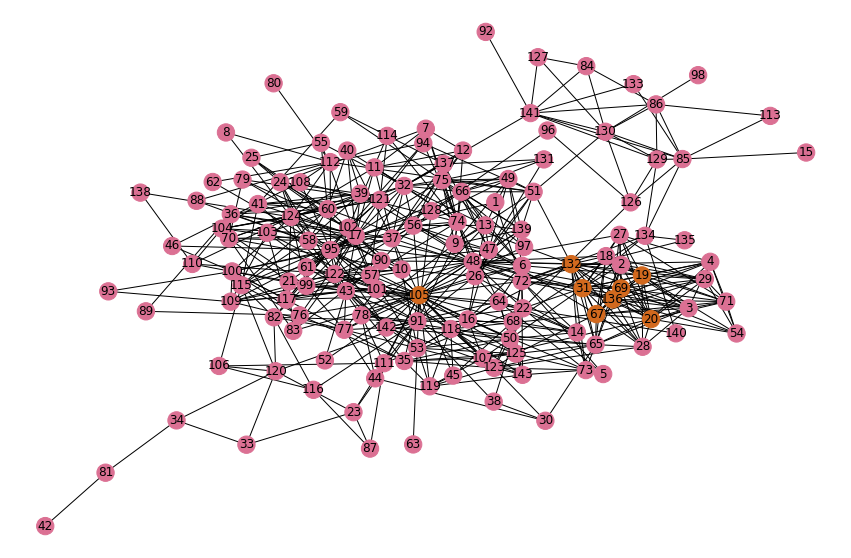

In [166]:
#highlights the network by partitioning into 3 communities depending on the total communicability distances
nodes1=dict(tele.degree());nodes1    #creating a dictionary of nodes and degrees from the graph
deg1=list(nodes1.values())       #Getting the degree of particular nodes 
n1=len(deg1)
color = []   # a list of color for highlighting
#hubs =[2,29,32,35]
for i in range(n1):     #iteration for partitioning
    if sum(M[i]) >= 20000:      #highly connected nodes conditioning, the top 5 
        color.append('chocolate')     
    #elif int(list(nodes1)[i]) in low_deg_nodes1_p:                 #less connected
     #   color.append('g')
    else :
        color.append('palevioletred')
pos=nx.kamada_kawai_layout(tele)      #redrawing the network
plt.figure(figsize=(15,10))    #plot figure
nx.draw_networkx(tele,pos,node_color = color)      #depending on the color partition
plt.axis('off')
plt.savefig('tele_p-comm_d.png')
plt.show()

In [167]:
Ldeg1=[]
Hdeg1 = []   # a list of color for highlighting
#hubs =[2,29,32,35]
for i in range(len(G.nodes)):     #iteration for partitioning
    if sum(M[i]) >= 20000:      #highly connected nodes conditioning, the top 5 
        Hdeg1.append(degree_sequence1[i])     
    #elif int(list(nodes1)[i]) in low_deg_nodes1_p:                 #less connected
     #   color.append('g')
    else :
        Hdeg1.append(degree_sequence1[i])
print(set(Hdeg1),'\n','\n',set(Ldeg1),'\n',set(Hdeg1)&set(Ldeg1))

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 23, 30, 42} 
 
 set() 
 set()


## Path Preservations

In [101]:
#for dis in nx.shortest_path_length(tele):
    #show(dis)
#print('\n','\n')
for l in nx.all_pairs_shortest_path(tele,1):
    show(l)
#print('\n','\n')    
#type(l)

('17',
 {'17': ['17'],
  '1': ['17', '1'],
  '10': ['17', '10'],
  '11': ['17', '11'],
  '21': ['17', '21'],
  '24': ['17', '24'],
  '25': ['17', '25'],
  '32': ['17', '32'],
  '36': ['17', '36'],
  '37': ['17', '37'],
  '39': ['17', '39'],
  '40': ['17', '40'],
  '41': ['17', '41'],
  '43': ['17', '43'],
  '48': ['17', '48'],
  '55': ['17', '55'],
  '58': ['17', '58'],
  '60': ['17', '60'],
  '61': ['17', '61'],
  '70': ['17', '70'],
  '76': ['17', '76'],
  '82': ['17', '82'],
  '95': ['17', '95'],
  '101': ['17', '101'],
  '104': ['17', '104'],
  '105': ['17', '105'],
  '115': ['17', '115'],
  '121': ['17', '121'],
  '122': ['17', '122'],
  '124': ['17', '124'],
  '128': ['17', '128']})

('1', {'1': ['1'], '17': ['1', '17'], '72': ['1', '72']})

('72',
 {'72': ['72'],
  '1': ['72', '1'],
  '5': ['72', '5'],
  '10': ['72', '10'],
  '14': ['72', '14'],
  '22': ['72', '22'],
  '31': ['72', '31'],
  '37': ['72', '37'],
  '48': ['72', '48'],
  '50': ['72', '50'],
  '68': ['72', '68'],
  '69': ['72', '69'],
  '105': ['72', '105'],
  '132': ['72', '132'],
  '134': ['72', '134'],
  '135': ['72', '135'],
  '136': ['72', '136'],
  '143': ['72', '143']})

('3',
 {'3': ['3'],
  '2': ['3', '2'],
  '4': ['3', '4'],
  '19': ['3', '19'],
  '20': ['3', '20'],
  '28': ['3', '28'],
  '31': ['3', '31'],
  '65': ['3', '65'],
  '67': ['3', '67'],
  '69': ['3', '69'],
  '71': ['3', '71'],
  '132': ['3', '132'],
  '136': ['3', '136']})

('2',
 {'2': ['2'],
  '3': ['2', '3'],
  '19': ['2', '19'],
  '20': ['2', '20'],
  '27': ['2', '27'],
  '29': ['2', '29'],
  '31': ['2', '31'],
  '48': ['2', '48'],
  '65': ['2', '65'],
  '67': ['2', '67'],
  '69': ['2', '69'],
  '71': ['2', '71'],
  '132': ['2', '132'],
  '136': ['2', '136']})

('19',
 {'19': ['19'],
  '2': ['19', '2'],
  '3': ['19', '3'],
  '4': ['19', '4'],
  '18': ['19', '18'],
  '20': ['19', '20'],
  '27': ['19', '27'],
  '28': ['19', '28'],
  '29': ['19', '29'],
  '31': ['19', '31'],
  '48': ['19', '48'],
  '54': ['19', '54'],
  '67': ['19', '67'],
  '69': ['19', '69'],
  '71': ['19', '71'],
  '132': ['19', '132'],
  '136': ['19', '136']})

('20',
 {'20': ['20'],
  '2': ['20', '2'],
  '3': ['20', '3'],
  '4': ['20', '4'],
  '18': ['20', '18'],
  '19': ['20', '19'],
  '27': ['20', '27'],
  '28': ['20', '28'],
  '29': ['20', '29'],
  '31': ['20', '31'],
  '54': ['20', '54'],
  '65': ['20', '65'],
  '67': ['20', '67'],
  '69': ['20', '69'],
  '71': ['20', '71'],
  '107': ['20', '107'],
  '132': ['20', '132'],
  '136': ['20', '136']})

('27',
 {'27': ['27'],
  '2': ['27', '2'],
  '4': ['27', '4'],
  '18': ['27', '18'],
  '19': ['27', '19'],
  '20': ['27', '20'],
  '31': ['27', '31'],
  '48': ['27', '48'],
  '69': ['27', '69'],
  '71': ['27', '71'],
  '136': ['27', '136']})

('29',
 {'29': ['29'],
  '2': ['29', '2'],
  '4': ['29', '4'],
  '18': ['29', '18'],
  '19': ['29', '19'],
  '20': ['29', '20'],
  '54': ['29', '54'],
  '67': ['29', '67'],
  '69': ['29', '69'],
  '71': ['29', '71'],
  '132': ['29', '132'],
  '136': ['29', '136']})

('31',
 {'31': ['31'],
  '2': ['31', '2'],
  '3': ['31', '3'],
  '4': ['31', '4'],
  '18': ['31', '18'],
  '19': ['31', '19'],
  '20': ['31', '20'],
  '22': ['31', '22'],
  '27': ['31', '27'],
  '28': ['31', '28'],
  '48': ['31', '48'],
  '50': ['31', '50'],
  '65': ['31', '65'],
  '67': ['31', '67'],
  '69': ['31', '69'],
  '72': ['31', '72'],
  '132': ['31', '132'],
  '134': ['31', '134'],
  '136': ['31', '136']})

('48',
 {'48': ['48'],
  '2': ['48', '2'],
  '17': ['48', '17'],
  '18': ['48', '18'],
  '19': ['48', '19'],
  '22': ['48', '22'],
  '27': ['48', '27'],
  '31': ['48', '31'],
  '39': ['48', '39'],
  '58': ['48', '58'],
  '60': ['48', '60'],
  '69': ['48', '69'],
  '72': ['48', '72'],
  '74': ['48', '74'],
  '90': ['48', '90'],
  '91': ['48', '91'],
  '99': ['48', '99'],
  '101': ['48', '101'],
  '121': ['48', '121'],
  '132': ['48', '132'],
  '136': ['48', '136']})

('65',
 {'65': ['65'],
  '2': ['65', '2'],
  '3': ['65', '3'],
  '18': ['65', '18'],
  '20': ['65', '20'],
  '28': ['65', '28'],
  '30': ['65', '30'],
  '31': ['65', '31'],
  '50': ['65', '50'],
  '67': ['65', '67'],
  '73': ['65', '73'],
  '118': ['65', '118'],
  '123': ['65', '123'],
  '125': ['65', '125'],
  '132': ['65', '132'],
  '136': ['65', '136']})

('67',
 {'67': ['67'],
  '2': ['67', '2'],
  '3': ['67', '3'],
  '18': ['67', '18'],
  '19': ['67', '19'],
  '20': ['67', '20'],
  '28': ['67', '28'],
  '29': ['67', '29'],
  '31': ['67', '31'],
  '47': ['67', '47'],
  '65': ['67', '65'],
  '69': ['67', '69'],
  '71': ['67', '71'],
  '118': ['67', '118'],
  '125': ['67', '125'],
  '132': ['67', '132'],
  '136': ['67', '136']})

('69',
 {'69': ['69'],
  '2': ['69', '2'],
  '3': ['69', '3'],
  '4': ['69', '4'],
  '18': ['69', '18'],
  '19': ['69', '19'],
  '20': ['69', '20'],
  '27': ['69', '27'],
  '28': ['69', '28'],
  '29': ['69', '29'],
  '31': ['69', '31'],
  '48': ['69', '48'],
  '54': ['69', '54'],
  '67': ['69', '67'],
  '71': ['69', '71'],
  '72': ['69', '72'],
  '136': ['69', '136']})

('71',
 {'71': ['71'],
  '2': ['71', '2'],
  '3': ['71', '3'],
  '4': ['71', '4'],
  '19': ['71', '19'],
  '20': ['71', '20'],
  '27': ['71', '27'],
  '29': ['71', '29'],
  '54': ['71', '54'],
  '67': ['71', '67'],
  '69': ['71', '69'],
  '136': ['71', '136']})

('132',
 {'132': ['132'],
  '2': ['132', '2'],
  '3': ['132', '3'],
  '4': ['132', '4'],
  '14': ['132', '14'],
  '18': ['132', '18'],
  '19': ['132', '19'],
  '20': ['132', '20'],
  '28': ['132', '28'],
  '29': ['132', '29'],
  '31': ['132', '31'],
  '48': ['132', '48'],
  '51': ['132', '51'],
  '64': ['132', '64'],
  '65': ['132', '65'],
  '67': ['132', '67'],
  '72': ['132', '72'],
  '73': ['132', '73'],
  '74': ['132', '74'],
  '136': ['132', '136']})

('136',
 {'136': ['136'],
  '2': ['136', '2'],
  '3': ['136', '3'],
  '4': ['136', '4'],
  '19': ['136', '19'],
  '20': ['136', '20'],
  '27': ['136', '27'],
  '28': ['136', '28'],
  '29': ['136', '29'],
  '31': ['136', '31'],
  '48': ['136', '48'],
  '54': ['136', '54'],
  '65': ['136', '65'],
  '67': ['136', '67'],
  '69': ['136', '69'],
  '71': ['136', '71'],
  '72': ['136', '72'],
  '132': ['136', '132']})

('4',
 {'4': ['4'],
  '3': ['4', '3'],
  '19': ['4', '19'],
  '20': ['4', '20'],
  '27': ['4', '27'],
  '29': ['4', '29'],
  '31': ['4', '31'],
  '54': ['4', '54'],
  '69': ['4', '69'],
  '71': ['4', '71'],
  '132': ['4', '132'],
  '136': ['4', '136']})

('28',
 {'28': ['28'],
  '3': ['28', '3'],
  '19': ['28', '19'],
  '20': ['28', '20'],
  '31': ['28', '31'],
  '65': ['28', '65'],
  '67': ['28', '67'],
  '69': ['28', '69'],
  '123': ['28', '123'],
  '132': ['28', '132'],
  '136': ['28', '136']})

('54',
 {'54': ['54'],
  '4': ['54', '4'],
  '19': ['54', '19'],
  '20': ['54', '20'],
  '29': ['54', '29'],
  '69': ['54', '69'],
  '71': ['54', '71'],
  '136': ['54', '136']})

('22',
 {'22': ['22'],
  '5': ['22', '5'],
  '14': ['22', '14'],
  '31': ['22', '31'],
  '38': ['22', '38'],
  '48': ['22', '48'],
  '50': ['22', '50'],
  '64': ['22', '64'],
  '68': ['22', '68'],
  '72': ['22', '72'],
  '91': ['22', '91'],
  '105': ['22', '105'],
  '111': ['22', '111'],
  '126': ['22', '126'],
  '140': ['22', '140']})

('5', {'5': ['5'], '22': ['5', '22'], '72': ['5', '72']})

('9',
 {'9': ['9'],
  '6': ['9', '6'],
  '13': ['9', '13'],
  '47': ['9', '47'],
  '49': ['9', '49'],
  '51': ['9', '51'],
  '56': ['9', '56'],
  '66': ['9', '66'],
  '74': ['9', '74'],
  '75': ['9', '75'],
  '78': ['9', '78'],
  '91': ['9', '91'],
  '139': ['9', '139']})

('6',
 {'6': ['6'],
  '9': ['6', '9'],
  '13': ['6', '13'],
  '16': ['6', '16'],
  '26': ['6', '26'],
  '47': ['6', '47'],
  '49': ['6', '49'],
  '64': ['6', '64'],
  '66': ['6', '66'],
  '105': ['6', '105']})

('13',
 {'13': ['13'],
  '6': ['13', '6'],
  '9': ['13', '9'],
  '26': ['13', '26'],
  '32': ['13', '32'],
  '47': ['13', '47'],
  '49': ['13', '49'],
  '56': ['13', '56'],
  '66': ['13', '66'],
  '75': ['13', '75'],
  '105': ['13', '105'],
  '139': ['13', '139']})

('16',
 {'16': ['16'],
  '6': ['16', '6'],
  '14': ['16', '14'],
  '26': ['16', '26'],
  '47': ['16', '47'],
  '50': ['16', '50'],
  '64': ['16', '64'],
  '73': ['16', '73'],
  '105': ['16', '105'],
  '107': ['16', '107'],
  '122': ['16', '122']})

('26',
 {'26': ['26'],
  '6': ['26', '6'],
  '13': ['26', '13'],
  '14': ['26', '14'],
  '16': ['26', '16'],
  '47': ['26', '47'],
  '51': ['26', '51'],
  '64': ['26', '64'],
  '74': ['26', '74'],
  '91': ['26', '91'],
  '105': ['26', '105'],
  '139': ['26', '139']})

('47',
 {'47': ['47'],
  '6': ['47', '6'],
  '9': ['47', '9'],
  '13': ['47', '13'],
  '16': ['47', '16'],
  '26': ['47', '26'],
  '49': ['47', '49'],
  '51': ['47', '51'],
  '56': ['47', '56'],
  '66': ['47', '66'],
  '67': ['47', '67'],
  '77': ['47', '77'],
  '90': ['47', '90'],
  '105': ['47', '105'],
  '131': ['47', '131'],
  '137': ['47', '137'],
  '139': ['47', '139']})

('49',
 {'49': ['49'],
  '6': ['49', '6'],
  '9': ['49', '9'],
  '13': ['49', '13'],
  '32': ['49', '32'],
  '47': ['49', '47'],
  '51': ['49', '51'],
  '56': ['49', '56'],
  '66': ['49', '66'],
  '75': ['49', '75'],
  '139': ['49', '139']})

('64',
 {'64': ['64'],
  '6': ['64', '6'],
  '14': ['64', '14'],
  '16': ['64', '16'],
  '22': ['64', '22'],
  '26': ['64', '26'],
  '50': ['64', '50'],
  '53': ['64', '53'],
  '73': ['64', '73'],
  '74': ['64', '74'],
  '105': ['64', '105'],
  '132': ['64', '132'],
  '142': ['64', '142'],
  '143': ['64', '143']})

('66',
 {'66': ['66'],
  '6': ['66', '6'],
  '9': ['66', '9'],
  '13': ['66', '13'],
  '32': ['66', '32'],
  '47': ['66', '47'],
  '49': ['66', '49'],
  '51': ['66', '51'],
  '56': ['66', '56'],
  '95': ['66', '95'],
  '131': ['66', '131'],
  '139': ['66', '139']})

('105',
 {'105': ['105'],
  '6': ['105', '6'],
  '13': ['105', '13'],
  '16': ['105', '16'],
  '17': ['105', '17'],
  '21': ['105', '21'],
  '22': ['105', '22'],
  '26': ['105', '26'],
  '35': ['105', '35'],
  '37': ['105', '37'],
  '43': ['105', '43'],
  '44': ['105', '44'],
  '45': ['105', '45'],
  '47': ['105', '47'],
  '50': ['105', '50'],
  '52': ['105', '52'],
  '53': ['105', '53'],
  '56': ['105', '56'],
  '57': ['105', '57'],
  '61': ['105', '61'],
  '64': ['105', '64'],
  '68': ['105', '68'],
  '72': ['105', '72'],
  '74': ['105', '74'],
  '76': ['105', '76'],
  '77': ['105', '77'],
  '78': ['105', '78'],
  '83': ['105', '83'],
  '91': ['105', '91'],
  '95': ['105', '95'],
  '97': ['105', '97'],
  '101': ['105', '101'],
  '102': ['105', '102'],
  '107': ['105', '107'],
  '111': ['105', '111'],
  '117': ['105', '117'],
  '118': ['105', '118'],
  '119': ['105', '119'],
  '122': ['105', '122'],
  '123': ['105', '123'],
  '125': ['105', '125'],
  '139': ['105', '139'],
  '142': ['105', '142']})

('11',
 {'11': ['11'],
  '7': ['11', '7'],
  '12': ['11', '12'],
  '17': ['11', '17'],
  '32': ['11', '32'],
  '37': ['11', '37'],
  '74': ['11', '74'],
  '124': ['11', '124'],
  '137': ['11', '137']})

('7',
 {'7': ['7'],
  '11': ['7', '11'],
  '12': ['7', '12'],
  '24': ['7', '24'],
  '74': ['7', '74'],
  '75': ['7', '75']})

('12',
 {'12': ['12'],
  '7': ['12', '7'],
  '11': ['12', '11'],
  '32': ['12', '32'],
  '37': ['12', '37'],
  '74': ['12', '74'],
  '75': ['12', '75']})

('24',
 {'24': ['24'],
  '7': ['24', '7'],
  '17': ['24', '17'],
  '25': ['24', '25'],
  '39': ['24', '39'],
  '58': ['24', '58'],
  '60': ['24', '60'],
  '122': ['24', '122'],
  '124': ['24', '124']})

('74',
 {'74': ['74'],
  '7': ['74', '7'],
  '9': ['74', '9'],
  '11': ['74', '11'],
  '12': ['74', '12'],
  '26': ['74', '26'],
  '32': ['74', '32'],
  '37': ['74', '37'],
  '48': ['74', '48'],
  '56': ['74', '56'],
  '57': ['74', '57'],
  '64': ['74', '64'],
  '75': ['74', '75'],
  '94': ['74', '94'],
  '105': ['74', '105'],
  '108': ['74', '108'],
  '114': ['74', '114'],
  '132': ['74', '132'],
  '137': ['74', '137']})

('75',
 {'75': ['75'],
  '7': ['75', '7'],
  '9': ['75', '9'],
  '12': ['75', '12'],
  '13': ['75', '13'],
  '32': ['75', '32'],
  '49': ['75', '49'],
  '51': ['75', '51'],
  '56': ['75', '56'],
  '59': ['75', '59'],
  '74': ['75', '74'],
  '95': ['75', '95'],
  '97': ['75', '97'],
  '131': ['75', '131'],
  '137': ['75', '137'],
  '139': ['75', '139']})

('112',
 {'112': ['112'],
  '8': ['112', '8'],
  '51': ['112', '51'],
  '62': ['112', '62'],
  '80': ['112', '80'],
  '88': ['112', '88'],
  '94': ['112', '94'],
  '95': ['112', '95'],
  '108': ['112', '108'],
  '124': ['112', '124']})

('8', {'8': ['8'], '112': ['8', '112'], '124': ['8', '124']})

('124',
 {'124': ['124'],
  '8': ['124', '8'],
  '10': ['124', '10'],
  '11': ['124', '11'],
  '17': ['124', '17'],
  '21': ['124', '21'],
  '24': ['124', '24'],
  '32': ['124', '32'],
  '60': ['124', '60'],
  '70': ['124', '70'],
  '78': ['124', '78'],
  '95': ['124', '95'],
  '99': ['124', '99'],
  '100': ['124', '100'],
  '104': ['124', '104'],
  '110': ['124', '110'],
  '112': ['124', '112'],
  '138': ['124', '138']})

('51',
 {'51': ['51'],
  '9': ['51', '9'],
  '26': ['51', '26'],
  '47': ['51', '47'],
  '49': ['51', '49'],
  '66': ['51', '66'],
  '75': ['51', '75'],
  '94': ['51', '94'],
  '112': ['51', '112'],
  '130': ['51', '130'],
  '132': ['51', '132'],
  '139': ['51', '139']})

('56',
 {'56': ['56'],
  '9': ['56', '9'],
  '13': ['56', '13'],
  '32': ['56', '32'],
  '37': ['56', '37'],
  '47': ['56', '47'],
  '49': ['56', '49'],
  '66': ['56', '66'],
  '74': ['56', '74'],
  '75': ['56', '75'],
  '90': ['56', '90'],
  '95': ['56', '95'],
  '105': ['56', '105'],
  '122': ['56', '122'],
  '137': ['56', '137']})

('78',
 {'78': ['78'],
  '9': ['78', '9'],
  '44': ['78', '44'],
  '91': ['78', '91'],
  '105': ['78', '105'],
  '111': ['78', '111'],
  '118': ['78', '118'],
  '124': ['78', '124']})

('91',
 {'91': ['91'],
  '9': ['91', '9'],
  '22': ['91', '22'],
  '23': ['91', '23'],
  '26': ['91', '26'],
  '38': ['91', '38'],
  '43': ['91', '43'],
  '48': ['91', '48'],
  '68': ['91', '68'],
  '78': ['91', '78'],
  '82': ['91', '82'],
  '105': ['91', '105'],
  '107': ['91', '107'],
  '111': ['91', '111'],
  '116': ['91', '116'],
  '120': ['91', '120'],
  '122': ['91', '122'],
  '128': ['91', '128'],
  '142': ['91', '142']})

('139',
 {'139': ['139'],
  '9': ['139', '9'],
  '13': ['139', '13'],
  '26': ['139', '26'],
  '47': ['139', '47'],
  '49': ['139', '49'],
  '51': ['139', '51'],
  '66': ['139', '66'],
  '75': ['139', '75'],
  '105': ['139', '105']})

('10',
 {'10': ['10'],
  '17': ['10', '17'],
  '21': ['10', '21'],
  '37': ['10', '37'],
  '53': ['10', '53'],
  '70': ['10', '70'],
  '72': ['10', '72'],
  '122': ['10', '122'],
  '124': ['10', '124']})

('21',
 {'21': ['21'],
  '10': ['21', '10'],
  '17': ['21', '17'],
  '70': ['21', '70'],
  '83': ['21', '83'],
  '105': ['21', '105'],
  '124': ['21', '124']})

('37',
 {'37': ['37'],
  '10': ['37', '10'],
  '11': ['37', '11'],
  '12': ['37', '12'],
  '17': ['37', '17'],
  '32': ['37', '32'],
  '36': ['37', '36'],
  '40': ['37', '40'],
  '56': ['37', '56'],
  '72': ['37', '72'],
  '74': ['37', '74'],
  '100': ['37', '100'],
  '105': ['37', '105'],
  '115': ['37', '115'],
  '137': ['37', '137']})

('53',
 {'53': ['53'],
  '10': ['53', '10'],
  '35': ['53', '35'],
  '43': ['53', '43'],
  '50': ['53', '50'],
  '57': ['53', '57'],
  '63': ['53', '63'],
  '64': ['53', '64'],
  '77': ['53', '77'],
  '105': ['53', '105'],
  '118': ['53', '118'],
  '119': ['53', '119'],
  '123': ['53', '123'],
  '125': ['53', '125'],
  '142': ['53', '142']})

('70',
 {'70': ['70'],
  '10': ['70', '10'],
  '17': ['70', '17'],
  '21': ['70', '21'],
  '39': ['70', '39'],
  '58': ['70', '58'],
  '79': ['70', '79'],
  '124': ['70', '124']})

('122',
 {'122': ['122'],
  '10': ['122', '10'],
  '16': ['122', '16'],
  '17': ['122', '17'],
  '24': ['122', '24'],
  '41': ['122', '41'],
  '43': ['122', '43'],
  '56': ['122', '56'],
  '83': ['122', '83'],
  '91': ['122', '91'],
  '95': ['122', '95'],
  '102': ['122', '102'],
  '105': ['122', '105'],
  '110': ['122', '110'],
  '142': ['122', '142']})

('32',
 {'32': ['32'],
  '11': ['32', '11'],
  '12': ['32', '12'],
  '13': ['32', '13'],
  '17': ['32', '17'],
  '37': ['32', '37'],
  '40': ['32', '40'],
  '43': ['32', '43'],
  '49': ['32', '49'],
  '55': ['32', '55'],
  '56': ['32', '56'],
  '66': ['32', '66'],
  '74': ['32', '74'],
  '75': ['32', '75'],
  '103': ['32', '103'],
  '124': ['32', '124'],
  '137': ['32', '137'],
  '141': ['32', '141']})

('137',
 {'137': ['137'],
  '11': ['137', '11'],
  '32': ['137', '32'],
  '37': ['137', '37'],
  '47': ['137', '47'],
  '56': ['137', '56'],
  '59': ['137', '59'],
  '74': ['137', '74'],
  '75': ['137', '75'],
  '121': ['137', '121'],
  '131': ['137', '131']})

('14',
 {'14': ['14'],
  '16': ['14', '16'],
  '22': ['14', '22'],
  '26': ['14', '26'],
  '50': ['14', '50'],
  '64': ['14', '64'],
  '68': ['14', '68'],
  '72': ['14', '72'],
  '73': ['14', '73'],
  '132': ['14', '132']})

('50',
 {'50': ['50'],
  '14': ['50', '14'],
  '16': ['50', '16'],
  '22': ['50', '22'],
  '31': ['50', '31'],
  '35': ['50', '35'],
  '53': ['50', '53'],
  '64': ['50', '64'],
  '65': ['50', '65'],
  '68': ['50', '68'],
  '72': ['50', '72'],
  '105': ['50', '105'],
  '107': ['50', '107'],
  '118': ['50', '118'],
  '123': ['50', '123'],
  '142': ['50', '142'],
  '143': ['50', '143']})

('68',
 {'68': ['68'],
  '14': ['68', '14'],
  '22': ['68', '22'],
  '45': ['68', '45'],
  '50': ['68', '50'],
  '72': ['68', '72'],
  '91': ['68', '91'],
  '105': ['68', '105'],
  '123': ['68', '123'],
  '125': ['68', '125'],
  '134': ['68', '134'],
  '143': ['68', '143']})

('73',
 {'73': ['73'],
  '14': ['73', '14'],
  '16': ['73', '16'],
  '64': ['73', '64'],
  '65': ['73', '65'],
  '123': ['73', '123'],
  '125': ['73', '125'],
  '132': ['73', '132'],
  '143': ['73', '143']})

('85',
 {'85': ['85'],
  '15': ['85', '15'],
  '86': ['85', '86'],
  '113': ['85', '113'],
  '126': ['85', '126'],
  '129': ['85', '129'],
  '130': ['85', '130'],
  '133': ['85', '133'],
  '134': ['85', '134'],
  '141': ['85', '141']})

('15', {'15': ['15'], '85': ['15', '85']})

('107',
 {'107': ['107'],
  '16': ['107', '16'],
  '20': ['107', '20'],
  '35': ['107', '35'],
  '50': ['107', '50'],
  '91': ['107', '91'],
  '105': ['107', '105'],
  '118': ['107', '118'],
  '119': ['107', '119'],
  '125': ['107', '125']})

('25',
 {'25': ['25'],
  '17': ['25', '17'],
  '24': ['25', '24'],
  '55': ['25', '55'],
  '60': ['25', '60']})

('36',
 {'36': ['36'],
  '17': ['36', '17'],
  '37': ['36', '37'],
  '39': ['36', '39'],
  '58': ['36', '58'],
  '60': ['36', '60'],
  '89': ['36', '89']})

('39',
 {'39': ['39'],
  '17': ['39', '17'],
  '24': ['39', '24'],
  '36': ['39', '36'],
  '40': ['39', '40'],
  '41': ['39', '41'],
  '48': ['39', '48'],
  '58': ['39', '58'],
  '60': ['39', '60'],
  '70': ['39', '70']})

('40',
 {'40': ['40'],
  '17': ['40', '17'],
  '32': ['40', '32'],
  '37': ['40', '37'],
  '39': ['40', '39'],
  '60': ['40', '60']})

('41',
 {'41': ['41'],
  '17': ['41', '17'],
  '39': ['41', '39'],
  '59': ['41', '59'],
  '60': ['41', '60'],
  '104': ['41', '104'],
  '115': ['41', '115'],
  '121': ['41', '121'],
  '122': ['41', '122']})

('43',
 {'43': ['43'],
  '17': ['43', '17'],
  '32': ['43', '32'],
  '35': ['43', '35'],
  '52': ['43', '52'],
  '53': ['43', '53'],
  '61': ['43', '61'],
  '77': ['43', '77'],
  '90': ['43', '90'],
  '91': ['43', '91'],
  '95': ['43', '95'],
  '99': ['43', '99'],
  '100': ['43', '100'],
  '101': ['43', '101'],
  '103': ['43', '103'],
  '105': ['43', '105'],
  '109': ['43', '109'],
  '117': ['43', '117'],
  '122': ['43', '122'],
  '142': ['43', '142']})

('55',
 {'55': ['55'],
  '17': ['55', '17'],
  '25': ['55', '25'],
  '32': ['55', '32'],
  '60': ['55', '60']})

('58',
 {'58': ['58'],
  '17': ['58', '17'],
  '24': ['58', '24'],
  '36': ['58', '36'],
  '39': ['58', '39'],
  '48': ['58', '48'],
  '60': ['58', '60'],
  '70': ['58', '70'],
  '104': ['58', '104'],
  '115': ['58', '115']})

('60',
 {'60': ['60'],
  '17': ['60', '17'],
  '24': ['60', '24'],
  '25': ['60', '25'],
  '36': ['60', '36'],
  '39': ['60', '39'],
  '40': ['60', '40'],
  '41': ['60', '41'],
  '48': ['60', '48'],
  '55': ['60', '55'],
  '58': ['60', '58'],
  '104': ['60', '104'],
  '115': ['60', '115'],
  '121': ['60', '121'],
  '124': ['60', '124']})

('61',
 {'61': ['61'],
  '17': ['61', '17'],
  '43': ['61', '43'],
  '95': ['61', '95'],
  '101': ['61', '101'],
  '105': ['61', '105'],
  '121': ['61', '121']})

('76',
 {'76': ['76'],
  '17': ['76', '17'],
  '35': ['76', '35'],
  '89': ['76', '89'],
  '100': ['76', '100'],
  '105': ['76', '105'],
  '115': ['76', '115']})

('82',
 {'82': ['82'],
  '17': ['82', '17'],
  '77': ['82', '77'],
  '91': ['82', '91'],
  '95': ['82', '95'],
  '115': ['82', '115'],
  '116': ['82', '116'],
  '120': ['82', '120']})

('95',
 {'95': ['95'],
  '17': ['95', '17'],
  '43': ['95', '43'],
  '46': ['95', '46'],
  '56': ['95', '56'],
  '57': ['95', '57'],
  '61': ['95', '61'],
  '62': ['95', '62'],
  '66': ['95', '66'],
  '75': ['95', '75'],
  '82': ['95', '82'],
  '88': ['95', '88'],
  '100': ['95', '100'],
  '101': ['95', '101'],
  '102': ['95', '102'],
  '105': ['95', '105'],
  '108': ['95', '108'],
  '109': ['95', '109'],
  '112': ['95', '112'],
  '117': ['95', '117'],
  '118': ['95', '118'],
  '122': ['95', '122'],
  '124': ['95', '124'],
  '142': ['95', '142']})

('101',
 {'101': ['101'],
  '17': ['101', '17'],
  '43': ['101', '43'],
  '48': ['101', '48'],
  '61': ['101', '61'],
  '77': ['101', '77'],
  '90': ['101', '90'],
  '95': ['101', '95'],
  '99': ['101', '99'],
  '103': ['101', '103'],
  '105': ['101', '105'],
  '109': ['101', '109'],
  '118': ['101', '118']})

('104',
 {'104': ['104'],
  '17': ['104', '17'],
  '41': ['104', '41'],
  '58': ['104', '58'],
  '60': ['104', '60'],
  '83': ['104', '83'],
  '99': ['104', '99'],
  '110': ['104', '110'],
  '121': ['104', '121'],
  '124': ['104', '124']})

('115',
 {'115': ['115'],
  '17': ['115', '17'],
  '37': ['115', '37'],
  '41': ['115', '41'],
  '58': ['115', '58'],
  '60': ['115', '60'],
  '76': ['115', '76'],
  '82': ['115', '82'],
  '100': ['115', '100'],
  '106': ['115', '106'],
  '120': ['115', '120']})

('121',
 {'121': ['121'],
  '17': ['121', '17'],
  '41': ['121', '41'],
  '48': ['121', '48'],
  '57': ['121', '57'],
  '60': ['121', '60'],
  '61': ['121', '61'],
  '79': ['121', '79'],
  '94': ['121', '94'],
  '102': ['121', '102'],
  '104': ['121', '104'],
  '114': ['121', '114'],
  '137': ['121', '137']})

('128',
 {'128': ['128'],
  '17': ['128', '17'],
  '91': ['128', '91'],
  '96': ['128', '96']})

('18',
 {'18': ['18'],
  '19': ['18', '19'],
  '20': ['18', '20'],
  '27': ['18', '27'],
  '29': ['18', '29'],
  '31': ['18', '31'],
  '48': ['18', '48'],
  '65': ['18', '65'],
  '67': ['18', '67'],
  '69': ['18', '69'],
  '132': ['18', '132']})

('83',
 {'83': ['83'],
  '21': ['83', '21'],
  '90': ['83', '90'],
  '104': ['83', '104'],
  '105': ['83', '105'],
  '122': ['83', '122']})

('38',
 {'38': ['38'], '22': ['38', '22'], '30': ['38', '30'], '91': ['38', '91']})

('111',
 {'111': ['111'],
  '22': ['111', '22'],
  '23': ['111', '23'],
  '78': ['111', '78'],
  '87': ['111', '87'],
  '91': ['111', '91'],
  '105': ['111', '105'],
  '106': ['111', '106']})

('126',
 {'126': ['126'],
  '22': ['126', '22'],
  '85': ['126', '85'],
  '96': ['126', '96'],
  '129': ['126', '129'],
  '130': ['126', '130']})

('140', {'140': ['140'], '22': ['140', '22'], '134': ['140', '134']})

('33',
 {'33': ['33'], '23': ['33', '23'], '34': ['33', '34'], '120': ['33', '120']})

('23',
 {'23': ['23'],
  '33': ['23', '33'],
  '87': ['23', '87'],
  '91': ['23', '91'],
  '111': ['23', '111'],
  '120': ['23', '120']})

('87',
 {'87': ['87'],
  '23': ['87', '23'],
  '111': ['87', '111'],
  '116': ['87', '116']})

('120',
 {'120': ['120'],
  '23': ['120', '23'],
  '33': ['120', '33'],
  '34': ['120', '34'],
  '82': ['120', '82'],
  '91': ['120', '91'],
  '106': ['120', '106'],
  '115': ['120', '115']})

('123',
 {'123': ['123'],
  '28': ['123', '28'],
  '30': ['123', '30'],
  '35': ['123', '35'],
  '50': ['123', '50'],
  '53': ['123', '53'],
  '65': ['123', '65'],
  '68': ['123', '68'],
  '73': ['123', '73'],
  '105': ['123', '105'],
  '118': ['123', '118'],
  '119': ['123', '119'],
  '125': ['123', '125'],
  '143': ['123', '143']})

('30',
 {'30': ['30'],
  '38': ['30', '38'],
  '44': ['30', '44'],
  '65': ['30', '65'],
  '123': ['30', '123']})

('44',
 {'44': ['44'],
  '30': ['44', '30'],
  '77': ['44', '77'],
  '78': ['44', '78'],
  '105': ['44', '105']})

('134',
 {'134': ['134'],
  '31': ['134', '31'],
  '68': ['134', '68'],
  '72': ['134', '72'],
  '85': ['134', '85'],
  '129': ['134', '129'],
  '135': ['134', '135'],
  '140': ['134', '140']})

('103',
 {'103': ['103'],
  '32': ['103', '32'],
  '43': ['103', '43'],
  '101': ['103', '101'],
  '109': ['103', '109'],
  '117': ['103', '117']})

('141',
 {'141': ['141'],
  '32': ['141', '32'],
  '84': ['141', '84'],
  '85': ['141', '85'],
  '86': ['141', '86'],
  '92': ['141', '92'],
  '127': ['141', '127'],
  '129': ['141', '129'],
  '130': ['141', '130'],
  '133': ['141', '133']})

('34',
 {'34': ['34'], '33': ['34', '33'], '81': ['34', '81'], '120': ['34', '120']})

('81', {'81': ['81'], '34': ['81', '34'], '42': ['81', '42']})

('35',
 {'35': ['35'],
  '43': ['35', '43'],
  '50': ['35', '50'],
  '53': ['35', '53'],
  '76': ['35', '76'],
  '77': ['35', '77'],
  '105': ['35', '105'],
  '107': ['35', '107'],
  '119': ['35', '119'],
  '123': ['35', '123'],
  '125': ['35', '125']})

('77',
 {'77': ['77'],
  '35': ['77', '35'],
  '43': ['77', '43'],
  '44': ['77', '44'],
  '47': ['77', '47'],
  '53': ['77', '53'],
  '82': ['77', '82'],
  '99': ['77', '99'],
  '100': ['77', '100'],
  '101': ['77', '101'],
  '105': ['77', '105'],
  '109': ['77', '109'],
  '142': ['77', '142']})

('119',
 {'119': ['119'],
  '35': ['119', '35'],
  '45': ['119', '45'],
  '53': ['119', '53'],
  '105': ['119', '105'],
  '107': ['119', '107'],
  '118': ['119', '118'],
  '123': ['119', '123'],
  '143': ['119', '143']})

('125',
 {'125': ['125'],
  '35': ['125', '35'],
  '53': ['125', '53'],
  '65': ['125', '65'],
  '67': ['125', '67'],
  '68': ['125', '68'],
  '73': ['125', '73'],
  '105': ['125', '105'],
  '107': ['125', '107'],
  '118': ['125', '118'],
  '123': ['125', '123']})

('89', {'89': ['89'], '36': ['89', '36'], '76': ['89', '76']})

('100',
 {'100': ['100'],
  '37': ['100', '37'],
  '43': ['100', '43'],
  '46': ['100', '46'],
  '76': ['100', '76'],
  '77': ['100', '77'],
  '93': ['100', '93'],
  '95': ['100', '95'],
  '109': ['100', '109'],
  '115': ['100', '115'],
  '117': ['100', '117'],
  '124': ['100', '124']})

('59',
 {'59': ['59'], '41': ['59', '41'], '75': ['59', '75'], '137': ['59', '137']})

('42', {'42': ['42'], '81': ['42', '81']})

('52', {'52': ['52'], '43': ['52', '43'], '105': ['52', '105']})

('90',
 {'90': ['90'],
  '43': ['90', '43'],
  '47': ['90', '47'],
  '48': ['90', '48'],
  '56': ['90', '56'],
  '79': ['90', '79'],
  '83': ['90', '83'],
  '99': ['90', '99'],
  '101': ['90', '101'],
  '109': ['90', '109']})

('99',
 {'99': ['99'],
  '43': ['99', '43'],
  '48': ['99', '48'],
  '77': ['99', '77'],
  '90': ['99', '90'],
  '101': ['99', '101'],
  '104': ['99', '104'],
  '109': ['99', '109'],
  '110': ['99', '110'],
  '124': ['99', '124']})

('109',
 {'109': ['109'],
  '43': ['109', '43'],
  '77': ['109', '77'],
  '90': ['109', '90'],
  '93': ['109', '93'],
  '95': ['109', '95'],
  '99': ['109', '99'],
  '100': ['109', '100'],
  '101': ['109', '101'],
  '103': ['109', '103']})

('117',
 {'117': ['117'],
  '43': ['117', '43'],
  '57': ['117', '57'],
  '95': ['117', '95'],
  '100': ['117', '100'],
  '102': ['117', '102'],
  '103': ['117', '103'],
  '105': ['117', '105']})

('142',
 {'142': ['142'],
  '43': ['142', '43'],
  '50': ['142', '50'],
  '53': ['142', '53'],
  '64': ['142', '64'],
  '77': ['142', '77'],
  '91': ['142', '91'],
  '95': ['142', '95'],
  '105': ['142', '105'],
  '118': ['142', '118'],
  '122': ['142', '122'],
  '143': ['142', '143']})

('45',
 {'45': ['45'],
  '68': ['45', '68'],
  '105': ['45', '105'],
  '118': ['45', '118'],
  '119': ['45', '119']})

('118',
 {'118': ['118'],
  '45': ['118', '45'],
  '50': ['118', '50'],
  '53': ['118', '53'],
  '65': ['118', '65'],
  '67': ['118', '67'],
  '78': ['118', '78'],
  '95': ['118', '95'],
  '101': ['118', '101'],
  '105': ['118', '105'],
  '107': ['118', '107'],
  '119': ['118', '119'],
  '123': ['118', '123'],
  '125': ['118', '125'],
  '142': ['118', '142'],
  '143': ['118', '143']})

('46',
 {'46': ['46'],
  '95': ['46', '95'],
  '100': ['46', '100'],
  '108': ['46', '108']})

('108',
 {'108': ['108'],
  '46': ['108', '46'],
  '74': ['108', '74'],
  '95': ['108', '95'],
  '112': ['108', '112']})

('131',
 {'131': ['131'],
  '47': ['131', '47'],
  '66': ['131', '66'],
  '75': ['131', '75'],
  '137': ['131', '137']})

('143',
 {'143': ['143'],
  '50': ['143', '50'],
  '64': ['143', '64'],
  '68': ['143', '68'],
  '72': ['143', '72'],
  '73': ['143', '73'],
  '118': ['143', '118'],
  '119': ['143', '119'],
  '123': ['143', '123'],
  '142': ['143', '142']})

('94',
 {'94': ['94'],
  '51': ['94', '51'],
  '74': ['94', '74'],
  '102': ['94', '102'],
  '112': ['94', '112'],
  '121': ['94', '121']})

('130',
 {'130': ['130'],
  '51': ['130', '51'],
  '84': ['130', '84'],
  '85': ['130', '85'],
  '86': ['130', '86'],
  '98': ['130', '98'],
  '126': ['130', '126'],
  '127': ['130', '127'],
  '129': ['130', '129'],
  '141': ['130', '141']})

('57',
 {'57': ['57'],
  '53': ['57', '53'],
  '74': ['57', '74'],
  '95': ['57', '95'],
  '102': ['57', '102'],
  '105': ['57', '105'],
  '117': ['57', '117'],
  '121': ['57', '121']})

('63', {'63': ['63'], '53': ['63', '53']})

('102',
 {'102': ['102'],
  '57': ['102', '57'],
  '79': ['102', '79'],
  '94': ['102', '94'],
  '95': ['102', '95'],
  '105': ['102', '105'],
  '114': ['102', '114'],
  '117': ['102', '117'],
  '121': ['102', '121'],
  '122': ['102', '122']})

('62', {'62': ['62'], '95': ['62', '95'], '112': ['62', '112']})

('79',
 {'79': ['79'],
  '70': ['79', '70'],
  '90': ['79', '90'],
  '102': ['79', '102'],
  '121': ['79', '121']})

('135', {'135': ['135'], '72': ['135', '72'], '134': ['135', '134']})

('114',
 {'114': ['114'],
  '74': ['114', '74'],
  '102': ['114', '102'],
  '121': ['114', '121']})

('97', {'97': ['97'], '75': ['97', '75'], '105': ['97', '105']})

('80', {'80': ['80'], '112': ['80', '112']})

('116',
 {'116': ['116'],
  '82': ['116', '82'],
  '87': ['116', '87'],
  '91': ['116', '91'],
  '106': ['116', '106']})

('86',
 {'86': ['86'],
  '84': ['86', '84'],
  '85': ['86', '85'],
  '113': ['86', '113'],
  '129': ['86', '129'],
  '130': ['86', '130'],
  '141': ['86', '141']})

('84',
 {'84': ['84'],
  '86': ['84', '86'],
  '127': ['84', '127'],
  '130': ['84', '130'],
  '141': ['84', '141']})

('127',
 {'127': ['127'],
  '84': ['127', '84'],
  '130': ['127', '130'],
  '141': ['127', '141']})

('113', {'113': ['113'], '85': ['113', '85'], '86': ['113', '86']})

('129',
 {'129': ['129'],
  '85': ['129', '85'],
  '86': ['129', '86'],
  '126': ['129', '126'],
  '130': ['129', '130'],
  '134': ['129', '134'],
  '141': ['129', '141']})

('133', {'133': ['133'], '85': ['133', '85'], '141': ['133', '141']})

('88', {'88': ['88'], '95': ['88', '95'], '112': ['88', '112']})

('92', {'92': ['92'], '141': ['92', '141']})

('93', {'93': ['93'], '100': ['93', '100'], '109': ['93', '109']})

('96', {'96': ['96'], '126': ['96', '126'], '128': ['96', '128']})

('98', {'98': ['98'], '130': ['98', '130']})

('110',
 {'110': ['110'],
  '99': ['110', '99'],
  '104': ['110', '104'],
  '122': ['110', '122'],
  '124': ['110', '124'],
  '138': ['110', '138']})

('106',
 {'106': ['106'],
  '111': ['106', '111'],
  '115': ['106', '115'],
  '116': ['106', '116'],
  '120': ['106', '120']})

('138', {'138': ['138'], '110': ['138', '110'], '124': ['138', '124']})

In [102]:
for d in nx.all_pairs_shortest_path_length(tele,1):
    show(d)
type(d)

('17',
 {'17': 0,
  '11': 1,
  '121': 1,
  '128': 1,
  '40': 1,
  '21': 1,
  '36': 1,
  '101': 1,
  '58': 1,
  '115': 1,
  '48': 1,
  '32': 1,
  '124': 1,
  '1': 1,
  '10': 1,
  '41': 1,
  '37': 1,
  '105': 1,
  '76': 1,
  '61': 1,
  '24': 1,
  '43': 1,
  '82': 1,
  '70': 1,
  '39': 1,
  '55': 1,
  '60': 1,
  '95': 1,
  '104': 1,
  '122': 1,
  '25': 1})

('1', {'1': 0, '72': 1, '17': 1})

('72',
 {'72': 0,
  '22': 1,
  '134': 1,
  '135': 1,
  '48': 1,
  '105': 1,
  '50': 1,
  '136': 1,
  '1': 1,
  '10': 1,
  '68': 1,
  '69': 1,
  '143': 1,
  '37': 1,
  '31': 1,
  '14': 1,
  '5': 1,
  '132': 1})

('3',
 {'3': 0,
  '67': 1,
  '31': 1,
  '136': 1,
  '65': 1,
  '69': 1,
  '132': 1,
  '2': 1,
  '19': 1,
  '4': 1,
  '28': 1,
  '20': 1,
  '71': 1})

('2',
 {'2': 0,
  '67': 1,
  '48': 1,
  '29': 1,
  '27': 1,
  '136': 1,
  '65': 1,
  '69': 1,
  '3': 1,
  '19': 1,
  '31': 1,
  '132': 1,
  '20': 1,
  '71': 1})

('19',
 {'19': 0,
  '18': 1,
  '67': 1,
  '54': 1,
  '48': 1,
  '29': 1,
  '31': 1,
  '27': 1,
  '136': 1,
  '69': 1,
  '132': 1,
  '3': 1,
  '2': 1,
  '4': 1,
  '28': 1,
  '20': 1,
  '71': 1})

('20',
 {'20': 0,
  '18': 1,
  '67': 1,
  '54': 1,
  '29': 1,
  '31': 1,
  '27': 1,
  '136': 1,
  '19': 1,
  '65': 1,
  '69': 1,
  '107': 1,
  '132': 1,
  '3': 1,
  '2': 1,
  '4': 1,
  '28': 1,
  '71': 1})

('27',
 {'27': 0,
  '18': 1,
  '48': 1,
  '31': 1,
  '136': 1,
  '69': 1,
  '2': 1,
  '19': 1,
  '4': 1,
  '20': 1,
  '71': 1})

('29',
 {'29': 0,
  '18': 1,
  '67': 1,
  '54': 1,
  '136': 1,
  '69': 1,
  '2': 1,
  '19': 1,
  '4': 1,
  '132': 1,
  '20': 1,
  '71': 1})

('31',
 {'31': 0,
  '18': 1,
  '22': 1,
  '67': 1,
  '134': 1,
  '72': 1,
  '48': 1,
  '27': 1,
  '136': 1,
  '19': 1,
  '65': 1,
  '69': 1,
  '3': 1,
  '2': 1,
  '50': 1,
  '4': 1,
  '28': 1,
  '20': 1,
  '132': 1})

('48',
 {'48': 0,
  '18': 1,
  '121': 1,
  '136': 1,
  '2': 1,
  '31': 1,
  '101': 1,
  '99': 1,
  '22': 1,
  '58': 1,
  '17': 1,
  '27': 1,
  '91': 1,
  '74': 1,
  '69': 1,
  '39': 1,
  '60': 1,
  '90': 1,
  '19': 1,
  '72': 1,
  '132': 1})

('65',
 {'65': 0,
  '18': 1,
  '67': 1,
  '123': 1,
  '118': 1,
  '136': 1,
  '73': 1,
  '30': 1,
  '3': 1,
  '2': 1,
  '50': 1,
  '31': 1,
  '28': 1,
  '20': 1,
  '125': 1,
  '132': 1})

('67',
 {'67': 0,
  '18': 1,
  '47': 1,
  '29': 1,
  '118': 1,
  '136': 1,
  '19': 1,
  '65': 1,
  '69': 1,
  '132': 1,
  '3': 1,
  '2': 1,
  '31': 1,
  '28': 1,
  '20': 1,
  '125': 1,
  '71': 1})

('69',
 {'69': 0,
  '18': 1,
  '67': 1,
  '54': 1,
  '48': 1,
  '29': 1,
  '31': 1,
  '27': 1,
  '136': 1,
  '19': 1,
  '3': 1,
  '2': 1,
  '72': 1,
  '4': 1,
  '28': 1,
  '20': 1,
  '71': 1})

('71',
 {'71': 0,
  '67': 1,
  '54': 1,
  '29': 1,
  '27': 1,
  '136': 1,
  '19': 1,
  '69': 1,
  '3': 1,
  '2': 1,
  '4': 1,
  '20': 1})

('132',
 {'132': 0,
  '18': 1,
  '136': 1,
  '65': 1,
  '2': 1,
  '31': 1,
  '4': 1,
  '20': 1,
  '64': 1,
  '48': 1,
  '29': 1,
  '51': 1,
  '67': 1,
  '74': 1,
  '73': 1,
  '28': 1,
  '14': 1,
  '3': 1,
  '19': 1,
  '72': 1})

('136',
 {'136': 0,
  '67': 1,
  '54': 1,
  '48': 1,
  '29': 1,
  '31': 1,
  '27': 1,
  '19': 1,
  '65': 1,
  '69': 1,
  '132': 1,
  '3': 1,
  '2': 1,
  '72': 1,
  '4': 1,
  '28': 1,
  '20': 1,
  '71': 1})

('4',
 {'4': 0,
  '54': 1,
  '29': 1,
  '27': 1,
  '136': 1,
  '69': 1,
  '3': 1,
  '19': 1,
  '31': 1,
  '132': 1,
  '20': 1,
  '71': 1})

('28',
 {'28': 0,
  '67': 1,
  '123': 1,
  '136': 1,
  '65': 1,
  '69': 1,
  '3': 1,
  '19': 1,
  '31': 1,
  '20': 1,
  '132': 1})

('54',
 {'54': 0, '29': 1, '136': 1, '69': 1, '19': 1, '4': 1, '20': 1, '71': 1})

('22',
 {'22': 0,
  '64': 1,
  '72': 1,
  '48': 1,
  '140': 1,
  '105': 1,
  '126': 1,
  '111': 1,
  '68': 1,
  '50': 1,
  '31': 1,
  '91': 1,
  '14': 1,
  '5': 1,
  '38': 1})

('5', {'5': 0, '22': 1, '72': 1})

('9',
 {'9': 0,
  '56': 1,
  '13': 1,
  '78': 1,
  '139': 1,
  '66': 1,
  '74': 1,
  '47': 1,
  '91': 1,
  '75': 1,
  '49': 1,
  '6': 1,
  '51': 1})

('6',
 {'6': 0,
  '64': 1,
  '26': 1,
  '13': 1,
  '105': 1,
  '66': 1,
  '16': 1,
  '47': 1,
  '9': 1,
  '49': 1})

('13',
 {'13': 0,
  '56': 1,
  '26': 1,
  '105': 1,
  '139': 1,
  '66': 1,
  '32': 1,
  '47': 1,
  '9': 1,
  '75': 1,
  '49': 1,
  '6': 1})

('16',
 {'16': 0,
  '64': 1,
  '26': 1,
  '105': 1,
  '122': 1,
  '107': 1,
  '47': 1,
  '50': 1,
  '73': 1,
  '14': 1,
  '6': 1})

('26',
 {'26': 0,
  '64': 1,
  '13': 1,
  '105': 1,
  '139': 1,
  '16': 1,
  '74': 1,
  '47': 1,
  '91': 1,
  '14': 1,
  '6': 1,
  '51': 1})

('47',
 {'47': 0,
  '56': 1,
  '137': 1,
  '67': 1,
  '26': 1,
  '13': 1,
  '105': 1,
  '139': 1,
  '66': 1,
  '16': 1,
  '90': 1,
  '131': 1,
  '9': 1,
  '77': 1,
  '49': 1,
  '6': 1,
  '51': 1})

('49',
 {'49': 0,
  '56': 1,
  '13': 1,
  '139': 1,
  '66': 1,
  '32': 1,
  '47': 1,
  '9': 1,
  '75': 1,
  '6': 1,
  '51': 1})

('64',
 {'64': 0,
  '22': 1,
  '26': 1,
  '105': 1,
  '142': 1,
  '16': 1,
  '74': 1,
  '143': 1,
  '50': 1,
  '73': 1,
  '14': 1,
  '53': 1,
  '6': 1,
  '132': 1})

('66',
 {'66': 0,
  '56': 1,
  '13': 1,
  '139': 1,
  '95': 1,
  '32': 1,
  '47': 1,
  '131': 1,
  '9': 1,
  '49': 1,
  '6': 1,
  '51': 1})

('105',
 {'105': 0,
  '26': 1,
  '13': 1,
  '57': 1,
  '16': 1,
  '119': 1,
  '47': 1,
  '21': 1,
  '101': 1,
  '97': 1,
  '53': 1,
  '6': 1,
  '102': 1,
  '22': 1,
  '52': 1,
  '125': 1,
  '17': 1,
  '64': 1,
  '123': 1,
  '107': 1,
  '45': 1,
  '37': 1,
  '68': 1,
  '91': 1,
  '78': 1,
  '77': 1,
  '118': 1,
  '76': 1,
  '111': 1,
  '74': 1,
  '61': 1,
  '83': 1,
  '50': 1,
  '43': 1,
  '117': 1,
  '56': 1,
  '35': 1,
  '122': 1,
  '95': 1,
  '142': 1,
  '72': 1,
  '44': 1,
  '139': 1})

('11',
 {'11': 0,
  '137': 1,
  '12': 1,
  '17': 1,
  '7': 1,
  '32': 1,
  '124': 1,
  '74': 1,
  '37': 1})

('7', {'7': 0, '11': 1, '12': 1, '74': 1, '24': 1, '75': 1})

('12', {'12': 0, '11': 1, '7': 1, '32': 1, '74': 1, '75': 1, '37': 1})

('24',
 {'24': 0,
  '58': 1,
  '17': 1,
  '39': 1,
  '7': 1,
  '60': 1,
  '122': 1,
  '124': 1,
  '25': 1})

('74',
 {'74': 0,
  '56': 1,
  '137': 1,
  '11': 1,
  '12': 1,
  '26': 1,
  '64': 1,
  '48': 1,
  '114': 1,
  '105': 1,
  '7': 1,
  '57': 1,
  '32': 1,
  '108': 1,
  '75': 1,
  '37': 1,
  '9': 1,
  '94': 1,
  '132': 1})

('75',
 {'75': 0,
  '56': 1,
  '137': 1,
  '12': 1,
  '13': 1,
  '7': 1,
  '59': 1,
  '95': 1,
  '32': 1,
  '74': 1,
  '131': 1,
  '9': 1,
  '97': 1,
  '49': 1,
  '139': 1,
  '51': 1})

('112',
 {'112': 0,
  '62': 1,
  '95': 1,
  '108': 1,
  '124': 1,
  '80': 1,
  '88': 1,
  '8': 1,
  '94': 1,
  '51': 1})

('8', {'8': 0, '124': 1, '112': 1})

('124',
 {'124': 0,
  '70': 1,
  '11': 1,
  '17': 1,
  '78': 1,
  '60': 1,
  '104': 1,
  '95': 1,
  '32': 1,
  '100': 1,
  '10': 1,
  '112': 1,
  '24': 1,
  '21': 1,
  '110': 1,
  '138': 1,
  '8': 1,
  '99': 1})

('51',
 {'51': 0,
  '26': 1,
  '139': 1,
  '66': 1,
  '112': 1,
  '130': 1,
  '47': 1,
  '9': 1,
  '75': 1,
  '49': 1,
  '94': 1,
  '132': 1})

('56',
 {'56': 0,
  '137': 1,
  '13': 1,
  '105': 1,
  '122': 1,
  '95': 1,
  '66': 1,
  '32': 1,
  '90': 1,
  '74': 1,
  '47': 1,
  '37': 1,
  '9': 1,
  '75': 1,
  '49': 1})

('78',
 {'78': 0, '105': 1, '118': 1, '111': 1, '124': 1, '44': 1, '9': 1, '91': 1})

('91',
 {'91': 0,
  '22': 1,
  '82': 1,
  '120': 1,
  '26': 1,
  '48': 1,
  '128': 1,
  '105': 1,
  '122': 1,
  '142': 1,
  '116': 1,
  '111': 1,
  '23': 1,
  '107': 1,
  '68': 1,
  '9': 1,
  '78': 1,
  '43': 1,
  '38': 1})

('139',
 {'139': 0,
  '26': 1,
  '13': 1,
  '105': 1,
  '66': 1,
  '47': 1,
  '9': 1,
  '75': 1,
  '49': 1,
  '51': 1})

('10',
 {'10': 0,
  '70': 1,
  '17': 1,
  '72': 1,
  '122': 1,
  '124': 1,
  '21': 1,
  '37': 1,
  '53': 1})

('21', {'21': 0, '70': 1, '17': 1, '105': 1, '124': 1, '10': 1, '83': 1})

('37',
 {'37': 0,
  '56': 1,
  '137': 1,
  '11': 1,
  '17': 1,
  '12': 1,
  '115': 1,
  '105': 1,
  '32': 1,
  '100': 1,
  '40': 1,
  '10': 1,
  '74': 1,
  '36': 1,
  '72': 1})

('53',
 {'53': 0,
  '35': 1,
  '64': 1,
  '123': 1,
  '105': 1,
  '118': 1,
  '57': 1,
  '142': 1,
  '119': 1,
  '63': 1,
  '10': 1,
  '50': 1,
  '77': 1,
  '43': 1,
  '125': 1})

('70',
 {'70': 0, '58': 1, '17': 1, '39': 1, '124': 1, '10': 1, '79': 1, '21': 1})

('122',
 {'122': 0,
  '56': 1,
  '17': 1,
  '102': 1,
  '105': 1,
  '95': 1,
  '142': 1,
  '16': 1,
  '10': 1,
  '24': 1,
  '83': 1,
  '41': 1,
  '110': 1,
  '91': 1,
  '43': 1})

('32',
 {'32': 0,
  '56': 1,
  '137': 1,
  '11': 1,
  '17': 1,
  '12': 1,
  '13': 1,
  '49': 1,
  '55': 1,
  '66': 1,
  '124': 1,
  '141': 1,
  '40': 1,
  '74': 1,
  '103': 1,
  '75': 1,
  '37': 1,
  '43': 1})

('137',
 {'137': 0,
  '56': 1,
  '11': 1,
  '121': 1,
  '59': 1,
  '32': 1,
  '74': 1,
  '47': 1,
  '37': 1,
  '131': 1,
  '75': 1})

('14',
 {'14': 0,
  '22': 1,
  '64': 1,
  '26': 1,
  '72': 1,
  '16': 1,
  '68': 1,
  '50': 1,
  '73': 1,
  '132': 1})

('50',
 {'50': 0,
  '22': 1,
  '35': 1,
  '64': 1,
  '72': 1,
  '123': 1,
  '105': 1,
  '118': 1,
  '142': 1,
  '16': 1,
  '65': 1,
  '107': 1,
  '143': 1,
  '68': 1,
  '31': 1,
  '14': 1,
  '53': 1})

('68',
 {'68': 0,
  '22': 1,
  '134': 1,
  '123': 1,
  '105': 1,
  '143': 1,
  '45': 1,
  '72': 1,
  '50': 1,
  '91': 1,
  '14': 1,
  '125': 1})

('73',
 {'73': 0,
  '64': 1,
  '123': 1,
  '16': 1,
  '65': 1,
  '143': 1,
  '14': 1,
  '125': 1,
  '132': 1})

('85',
 {'85': 0,
  '129': 1,
  '133': 1,
  '134': 1,
  '86': 1,
  '126': 1,
  '141': 1,
  '113': 1,
  '15': 1,
  '130': 1})

('15', {'15': 0, '85': 1})

('107',
 {'107': 0,
  '35': 1,
  '105': 1,
  '118': 1,
  '16': 1,
  '119': 1,
  '50': 1,
  '91': 1,
  '20': 1,
  '125': 1})

('25', {'25': 0, '55': 1, '17': 1, '24': 1, '60': 1})

('36', {'36': 0, '89': 1, '58': 1, '17': 1, '39': 1, '60': 1, '37': 1})

('39',
 {'39': 0,
  '58': 1,
  '70': 1,
  '17': 1,
  '48': 1,
  '60': 1,
  '40': 1,
  '24': 1,
  '41': 1,
  '36': 1})

('40', {'40': 0, '17': 1, '39': 1, '60': 1, '32': 1, '37': 1})

('41',
 {'41': 0,
  '115': 1,
  '17': 1,
  '121': 1,
  '39': 1,
  '59': 1,
  '104': 1,
  '60': 1,
  '122': 1})

('43',
 {'43': 0,
  '103': 1,
  '101': 1,
  '99': 1,
  '53': 1,
  '52': 1,
  '17': 1,
  '109': 1,
  '32': 1,
  '91': 1,
  '77': 1,
  '105': 1,
  '61': 1,
  '117': 1,
  '35': 1,
  '122': 1,
  '95': 1,
  '142': 1,
  '90': 1,
  '100': 1})

('55', {'55': 0, '60': 1, '17': 1, '32': 1, '25': 1})

('58',
 {'58': 0,
  '70': 1,
  '115': 1,
  '17': 1,
  '48': 1,
  '39': 1,
  '60': 1,
  '104': 1,
  '24': 1,
  '36': 1})

('60',
 {'60': 0,
  '58': 1,
  '115': 1,
  '17': 1,
  '121': 1,
  '48': 1,
  '39': 1,
  '41': 1,
  '55': 1,
  '104': 1,
  '124': 1,
  '40': 1,
  '24': 1,
  '36': 1,
  '25': 1})

('61', {'61': 0, '17': 1, '121': 1, '105': 1, '95': 1, '101': 1, '43': 1})

('76', {'76': 0, '89': 1, '35': 1, '17': 1, '115': 1, '105': 1, '100': 1})

('82',
 {'82': 0, '115': 1, '17': 1, '95': 1, '116': 1, '91': 1, '77': 1, '120': 1})

('95',
 {'95': 0,
  '57': 1,
  '108': 1,
  '101': 1,
  '102': 1,
  '17': 1,
  '109': 1,
  '124': 1,
  '105': 1,
  '118': 1,
  '62': 1,
  '61': 1,
  '112': 1,
  '43': 1,
  '117': 1,
  '56': 1,
  '82': 1,
  '122': 1,
  '142': 1,
  '66': 1,
  '100': 1,
  '46': 1,
  '75': 1,
  '88': 1})

('101',
 {'101': 0,
  '17': 1,
  '48': 1,
  '109': 1,
  '105': 1,
  '118': 1,
  '95': 1,
  '90': 1,
  '99': 1,
  '61': 1,
  '103': 1,
  '77': 1,
  '43': 1})

('104',
 {'104': 0,
  '58': 1,
  '17': 1,
  '121': 1,
  '60': 1,
  '124': 1,
  '83': 1,
  '41': 1,
  '110': 1,
  '99': 1})

('115',
 {'115': 0,
  '82': 1,
  '58': 1,
  '17': 1,
  '60': 1,
  '76': 1,
  '100': 1,
  '106': 1,
  '41': 1,
  '37': 1,
  '120': 1})

('121',
 {'121': 0,
  '137': 1,
  '114': 1,
  '17': 1,
  '48': 1,
  '60': 1,
  '104': 1,
  '57': 1,
  '61': 1,
  '79': 1,
  '41': 1,
  '94': 1,
  '102': 1})

('128', {'128': 0, '91': 1, '17': 1, '96': 1})

('18',
 {'18': 0,
  '67': 1,
  '48': 1,
  '29': 1,
  '27': 1,
  '65': 1,
  '69': 1,
  '19': 1,
  '31': 1,
  '20': 1,
  '132': 1})

('83', {'83': 0, '105': 1, '122': 1, '104': 1, '90': 1, '21': 1})

('38', {'38': 0, '22': 1, '91': 1, '30': 1})

('111',
 {'111': 0, '22': 1, '105': 1, '87': 1, '106': 1, '91': 1, '23': 1, '78': 1})

('126', {'126': 0, '22': 1, '129': 1, '96': 1, '85': 1, '130': 1})

('140', {'140': 0, '22': 1, '134': 1})

('33', {'33': 0, '34': 1, '23': 1, '120': 1})

('23', {'23': 0, '33': 1, '87': 1, '111': 1, '91': 1, '120': 1})

('87', {'87': 0, '111': 1, '23': 1, '116': 1})

('120',
 {'120': 0, '82': 1, '115': 1, '33': 1, '106': 1, '34': 1, '91': 1, '23': 1})

('123',
 {'123': 0,
  '35': 1,
  '105': 1,
  '118': 1,
  '73': 1,
  '65': 1,
  '119': 1,
  '30': 1,
  '143': 1,
  '68': 1,
  '50': 1,
  '28': 1,
  '53': 1,
  '125': 1})

('30', {'30': 0, '123': 1, '44': 1, '38': 1, '65': 1})

('44', {'44': 0, '105': 1, '77': 1, '78': 1, '30': 1})

('134',
 {'134': 0, '129': 1, '72': 1, '140': 1, '85': 1, '68': 1, '31': 1, '135': 1})

('103', {'103': 0, '109': 1, '32': 1, '101': 1, '43': 1, '117': 1})

('141',
 {'141': 0,
  '127': 1,
  '129': 1,
  '133': 1,
  '92': 1,
  '86': 1,
  '32': 1,
  '84': 1,
  '85': 1,
  '130': 1})

('34', {'34': 0, '33': 1, '120': 1, '81': 1})

('81', {'81': 0, '34': 1, '42': 1})

('35',
 {'35': 0,
  '123': 1,
  '105': 1,
  '119': 1,
  '76': 1,
  '43': 1,
  '107': 1,
  '50': 1,
  '77': 1,
  '53': 1,
  '125': 1})

('77',
 {'77': 0,
  '82': 1,
  '35': 1,
  '109': 1,
  '105': 1,
  '142': 1,
  '99': 1,
  '43': 1,
  '100': 1,
  '47': 1,
  '44': 1,
  '101': 1,
  '53': 1})

('119',
 {'119': 0,
  '35': 1,
  '123': 1,
  '105': 1,
  '118': 1,
  '107': 1,
  '143': 1,
  '45': 1,
  '53': 1})

('125',
 {'125': 0,
  '67': 1,
  '35': 1,
  '123': 1,
  '105': 1,
  '118': 1,
  '65': 1,
  '107': 1,
  '68': 1,
  '73': 1,
  '53': 1})

('89', {'89': 0, '76': 1, '36': 1})

('100',
 {'100': 0,
  '115': 1,
  '109': 1,
  '93': 1,
  '95': 1,
  '76': 1,
  '124': 1,
  '46': 1,
  '37': 1,
  '77': 1,
  '43': 1,
  '117': 1})

('59', {'59': 0, '137': 1, '75': 1, '41': 1})

('42', {'42': 0, '81': 1})

('52', {'52': 0, '105': 1, '43': 1})

('90',
 {'90': 0,
  '56': 1,
  '48': 1,
  '109': 1,
  '99': 1,
  '79': 1,
  '83': 1,
  '47': 1,
  '101': 1,
  '43': 1})

('99',
 {'99': 0,
  '48': 1,
  '109': 1,
  '104': 1,
  '90': 1,
  '124': 1,
  '110': 1,
  '101': 1,
  '77': 1,
  '43': 1})

('109',
 {'109': 0,
  '93': 1,
  '95': 1,
  '90': 1,
  '99': 1,
  '100': 1,
  '103': 1,
  '101': 1,
  '77': 1,
  '43': 1})

('117',
 {'117': 0, '105': 1, '57': 1, '95': 1, '100': 1, '43': 1, '103': 1, '102': 1})

('142',
 {'142': 0,
  '64': 1,
  '105': 1,
  '118': 1,
  '122': 1,
  '95': 1,
  '43': 1,
  '143': 1,
  '50': 1,
  '91': 1,
  '77': 1,
  '53': 1})

('45', {'45': 0, '68': 1, '105': 1, '118': 1, '119': 1})

('118',
 {'118': 0,
  '67': 1,
  '123': 1,
  '105': 1,
  '95': 1,
  '101': 1,
  '119': 1,
  '65': 1,
  '142': 1,
  '107': 1,
  '143': 1,
  '45': 1,
  '50': 1,
  '78': 1,
  '53': 1,
  '125': 1})

('46', {'46': 0, '100': 1, '95': 1, '108': 1})

('108', {'108': 0, '74': 1, '46': 1, '95': 1, '112': 1})

('131', {'131': 0, '137': 1, '75': 1, '66': 1, '47': 1})

('143',
 {'143': 0,
  '72': 1,
  '64': 1,
  '123': 1,
  '118': 1,
  '142': 1,
  '119': 1,
  '68': 1,
  '50': 1,
  '73': 1})

('94', {'94': 0, '121': 1, '74': 1, '112': 1, '102': 1, '51': 1})

('130',
 {'130': 0,
  '127': 1,
  '129': 1,
  '86': 1,
  '126': 1,
  '98': 1,
  '141': 1,
  '84': 1,
  '85': 1,
  '51': 1})

('57',
 {'57': 0, '121': 1, '102': 1, '105': 1, '95': 1, '74': 1, '53': 1, '117': 1})

('63', {'63': 0, '53': 1})

('102',
 {'102': 0,
  '114': 1,
  '121': 1,
  '105': 1,
  '122': 1,
  '57': 1,
  '95': 1,
  '79': 1,
  '94': 1,
  '117': 1})

('62', {'62': 0, '95': 1, '112': 1})

('79', {'79': 0, '70': 1, '121': 1, '102': 1, '90': 1})

('135', {'135': 0, '72': 1, '134': 1})

('114', {'114': 0, '121': 1, '74': 1, '102': 1})

('97', {'97': 0, '105': 1, '75': 1})

('80', {'80': 0, '112': 1})

('116', {'116': 0, '82': 1, '91': 1, '106': 1, '87': 1})

('86', {'86': 0, '129': 1, '141': 1, '113': 1, '84': 1, '85': 1, '130': 1})

('84', {'84': 0, '141': 1, '127': 1, '130': 1, '86': 1})

('127', {'127': 0, '141': 1, '84': 1, '130': 1})

('113', {'113': 0, '85': 1, '86': 1})

('129', {'129': 0, '134': 1, '86': 1, '126': 1, '141': 1, '85': 1, '130': 1})

('133', {'133': 0, '141': 1, '85': 1})

('88', {'88': 0, '95': 1, '112': 1})

('92', {'92': 0, '141': 1})

('93', {'93': 0, '100': 1, '109': 1})

('96', {'96': 0, '126': 1, '128': 1})

('98', {'98': 0, '130': 1})

('110', {'110': 0, '122': 1, '104': 1, '124': 1, '138': 1, '99': 1})

('106', {'106': 0, '111': 1, '115': 1, '120': 1, '116': 1})

('138', {'138': 0, '110': 1, '124': 1})

<class 'tuple'>

In [103]:
D=list(d)
print(d)
Sd=list(D[1].keys())
Sd[1:]
#Sd[1]

('138', {'138': 0, '110': 1, '124': 1})


['110', '124']

In [104]:
for s in (1,len(Sd)-1):
    print(Sd[0],':',Sd[s],'=',N(M[int(Sd[0]),int(Sd[s])],digits=8))

138 : 110 = 92.220620
138 : 124 = 11.789695


In [117]:
for d in nx.all_pairs_shortest_path_length(tele,1):
    for s in (1,len(Sd)-1):
        D=list(d)
        Sd=list(D[1].keys()) 
    #for s in (1,len(Sd)-1):
        print(Sd[0],':',Sd[s],'=',N(M[int(Sd[0]),int(Sd[s])],digits=8))

17 : 11 = 192.46787
17 : 128 = 125.49510
1 : 72 = 21.218763


IndexError: list index out of range

In [82]:
cc=(nx.clustering(tele))
ct=list(cc.keys())
int(ct[0])
#for n in low_deg_nodes1:
    
    #print(list(nx.clustering(tele))[n])

17

In [ ]:
#long paths